#### Lab4

In [2]:
# !pip install nltk

import matplotlib.pyplot as plt
import nltk
import math
nltk.download('punkt')
from nltk.collocations import *
from nltk.tokenize import *
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abylayaitbanov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
with open('roosevelt.txt', encoding='utf-8') as wordfile:
    text = wordfile.read()
words = nltk.word_tokenize(text)#список всех слов 
bigram_measures = nltk.collocations.BigramAssocMeasures()#реализация функции поточной энтропии
finder = BigramCollocationFinder.from_words(words)#находим устойчивые выражения 
finder.apply_freq_filter(2)#срезаем все пары слов которые встречаются реже чем 2 раза 
scored =finder.score_ngrams(bigram_measures.pmi)#кандидаты (Pointwise Mutual Information.)

In [4]:
finder


In [5]:
words

['Theodore',
 'Roosevelt',
 ';',
 'An',
 'Intimate',
 'Biography',
 ',',
 'by',
 'William',
 'Roscoe',
 'Thayer',
 '1919',
 'PREFACE',
 'In',
 'finishing',
 'the',
 'correction',
 'of',
 'the',
 'last',
 'proofs',
 'of',
 'this',
 'sketch',
 ',',
 'I',
 'perceive',
 'that',
 'some',
 'of',
 'those',
 'who',
 'read',
 'it',
 'may',
 'suppose',
 'that',
 'I',
 'planned',
 'to',
 'write',
 'a',
 'deliberate',
 'eulogy',
 'of',
 'Theodore',
 'Roosevelt',
 '.',
 'This',
 'is',
 'not',
 'true',
 '.',
 'I',
 'knew',
 'him',
 'for',
 'forty',
 'years',
 ',',
 'but',
 'I',
 'never',
 'followed',
 'his',
 'political',
 'leadership',
 '.',
 'Our',
 'political',
 'differences',
 ',',
 'however',
 ',',
 'never',
 'lessened',
 'our',
 'personal',
 'friendship',
 '.',
 'Sometimes',
 'long',
 'intervals',
 'elapsed',
 'between',
 'our',
 'meetings',
 ',',
 'but',
 'when',
 'we',
 'met',
 'it',
 'was',
 'always',
 'with',
 'the',
 'same',
 'intimacy',
 ',',
 'and',
 'when',
 'we',
 'wrote',
 'it',
 'wa

In [32]:
scored


[(("'S", 'FOREIGN'), 15.836629822460537),
 (('APPLYING', 'MORALS'), 15.836629822460537),
 (('Alpha', 'Delta'), 15.836629822460537),
 (('BRAZILIAN', 'ORDEAL'), 15.836629822460537),
 (('BREAKING', 'INTO'), 15.836629822460537),
 (('Billy', "O'Neil"), 15.836629822460537),
 (('CHOOSING', 'HIS'), 15.836629822460537),
 (('Cape', 'Horn'), 15.836629822460537),
 (('DEAL', 'IN'), 15.836629822460537),
 (('FIRST', 'CROSSROADS'), 15.836629822460537),
 (('FOREIGN', 'POLICY'), 15.836629822460537),
 (('GOVERNOR', 'OF'), 15.836629822460537),
 (('GREAT', 'CRUSADE'), 15.836629822460537),
 (('HIS', 'SUCCESSOR'), 15.836629822460537),
 (('Hong', 'Kong'), 15.836629822460537),
 (('Houghton', 'Mifflin'), 15.836629822460537),
 (('IN', 'ACTION'), 15.836629822460537),
 (('Industrial', 'Workers'), 15.836629822460537),
 (('Jay', 'Gould'), 15.836629822460537),
 (('NEW', 'YORK'), 15.836629822460537),
 (('OF', 'NEW'), 15.836629822460537),
 (('Open', 'Door'), 15.836629822460537),
 (('REPUBLICAN', 'PARTY'), 15.8366298224

In [7]:
def clustering_coefficient(G,v):#5
    neighbors = G[v].keys()
    if len(neighbors) == 1: return -1.0
    links = 0
    for w in neighbors:
        for u in neighbors:
            if u in G[w]: links += 0.5
    return 2.0*links/(len(neighbors)*(len(neighbors)-1))

In [8]:
import networkx as nx#1
G={}
# dictionary=nx.clustering(G, scored.keys(), scored.values)

graph=nx.Graph()
for (x,y),score in scored:
    if score>0:
        graph.add_edge(x,y,weight=score)


In [9]:
nx.write_graphml(graph,"bigrams.graphml",encoding='utf-8',prettyprint=True)

In [10]:
def make_link(G, node1, node2):#3
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

In [11]:
for (x,y) in scored: #2
    G = make_link(G,x,y)

In [12]:
#4
for word in G.keys():
    coeff=(clustering_coefficient(G,word))
    print(word,coeff)
    
    if coeff>0:
        print(word+' : '+str(coeff))

("'S", 'FOREIGN') -1.0
15.836629822460537 0.0
('APPLYING', 'MORALS') -1.0
('Alpha', 'Delta') -1.0
('BRAZILIAN', 'ORDEAL') -1.0
('BREAKING', 'INTO') -1.0
('Billy', "O'Neil") -1.0
('CHOOSING', 'HIS') -1.0
('Cape', 'Horn') -1.0
('DEAL', 'IN') -1.0
('FIRST', 'CROSSROADS') -1.0
('FOREIGN', 'POLICY') -1.0
('GOVERNOR', 'OF') -1.0
('GREAT', 'CRUSADE') -1.0
('HIS', 'SUCCESSOR') -1.0
('Hong', 'Kong') -1.0
('Houghton', 'Mifflin') -1.0
('IN', 'ACTION') -1.0
('Industrial', 'Workers') -1.0
('Jay', 'Gould') -1.0
('NEW', 'YORK') -1.0
('OF', 'NEW') -1.0
('Open', 'Door') -1.0
('REPUBLICAN', 'PARTY') -1.0
('ROUGH', 'RIDER') -1.0
('SQUARE', 'DEAL') -1.0
('Smithsonian', 'Institution') -1.0
('Standard', 'Oil') -1.0
('V.', 'BACK') -1.0
('consummate', 'actor') -1.0
('hallowed', 'associations') -1.0
('rotten', 'apples') -1.0
('Bad', 'Lands') -1.0
15.251667321739383 0.0
('Gentle', 'Shepherd') -1.0
('Merry', 'del') -1.0
('Penal', 'Code') -1.0
('del', 'Val') -1.0
('Alexander', 'Lambert') -1.0
15.251667321739381 0

('excursions', 'into') -1.0
('into', 'oblivion') -1.0
('an', 'additional') -1.0
8.770540632002765 0.0
('an', 'ardent') -1.0
('an', 'armistice') -1.0
('an', 'automobile') -1.0
('an', 'instant') -1.0
('thirty', 'years') -1.0
8.770540632002763 -1.0
('swallowed', 'up') -1.0
8.751821434656176 -1.0
('entire', 'body') -1.0
8.749166981210198 0.0
('rather', 'small') -1.0
('George', 'W.') -1.0
8.743872681540685 0.0
('tells', 'me') -1.0
('American', 'warships') -1.0
8.733342014048517 -1.0
('veteran', 'Republican') -1.0
8.728105365682369 -1.0
('any', 'rate') -1.0
8.721152605040603 -1.0
('Brownsville', '?') -1.0
8.71250851063135 -1.0
('negro', 'delegates') -1.0
8.70734680551557 -1.0
('many', 'amusing') -1.0
8.697078470061744 -1.0
('nation', 'may') -1.0
8.69027329215663 -1.0
('always', 'engaged') -1.0
8.68942489751831 0.0
('mere', 'words') -1.0
('Mr.', 'Barnes') -1.0
8.6828244863815 -1.0
('sent', 'word') -1.0
8.673399473592236 -1.0
('entered', 'Congress') -1.0
8.666704821018223 -1.0
('vital', 'fact'

('public', 'matters') -1.0
6.836629822460537 -1.0
('learned', 'how') -1.0
6.833814806853482 -1.0
('for', 'granted') -1.0
6.8328776875994315 -1.0
('rather', 'than') -1.0
6.826334841732658 -1.0
('your', 'own') -1.0
6.822609352145603 -1.0
('accuse', 'him') -1.0
6.8191254213511225 0.0
('afford', 'him') -1.0
('afforded', 'him') -1.0
('nicknamed', 'him') -1.0
('shelve', 'him') -1.0
('State', 'Department') -1.0
6.814955779602167 -1.0
('It', 'meant') -1.0
6.814262009432083 -1.0
('Equality', 'were') -1.0
6.813337501203785 -1.0
('tenderfoot', "''") -1.0
6.808723825890652 -1.0
('Every', 'one') -1.0
6.805617915022831 -1.0
('been', 'born') -1.0
6.803206820923087 -1.0
('``', 'tenderfoot') -1.0
6.800456209907054 -1.0
('``', 'My') -1.0
6.800456209907052 0.0
('``', 'Winning') -1.0
('``', 'swelled') -1.0
('some', 'measure') -1.0
('responsible', 'for') -1.0
6.792235703102085 -1.0
('years', 'before') -1.0
6.783479687710265 -1.0
('first', 'treaty') -1.0
6.783382696548111 -1.0
('ranchman', "'s") -1.0
6.7813

5.781347386959348 -1.0
('see', 'how') -1.0
5.781347386959347 -1.0
('any', 'part') -1.0
5.778638099701363 -1.0
('dozen', 'or') -1.0
5.777961572119967 -1.0
('then', 'wrote') -1.0
5.773909055295492 -1.0
('said', ':') -1.0
5.77262200171033 -1.0
('an', 'example') -1.0
5.770540632002765 0.0
('later', 'years') -1.0
('all', 'classes') -1.0
5.769867890073629 0.0
('me', '!') -1.0
('from', 'outside') -1.0
5.766508877983714 0.0
('miles', 'from') -1.0
('suffered', 'from') -1.0
('The', 'Recall') -1.0
5.765838013037477 -1.0
('we', 'care') -1.0
5.76483230017633 -1.0
('persons', 'who') -1.0
5.764273873600404 -1.0
(':', "'") -1.0
5.760649360044249 -1.0
('it', 'appeared') -1.0
5.755812294852211 0.0
('it', 'appears') -1.0
('it', 'impressed') -1.0
('in', 'vain') -1.0
5.755812294852209 -1.0
('these', 'same') -1.0
5.749166981210198 -1.0
('As', 'Governor') -1.0
5.748172818974311 -1.0
('between', 'two') -1.0
5.7478415837436305 -1.0
('he', 'persuaded') -1.0
5.746517402796249 0.0
('he', 'undertook') -1.0
('shoul

5.208119186100406 -1.0
('Ambassador', 'at') -1.0
5.207273202380929 0.0
('Coal', 'and') -1.0
('Gould', 'and') -1.0
('Yard', 'and') -1.0
('amuck', 'and') -1.0
('and', 'Turner') -1.0
('and', 'Wilmot') -1.0
('and', 'curses') -1.0
('and', 'dislikes') -1.0
('and', 'imposing') -1.0
('and', 'intimated') -1.0
('and', 'patience') -1.0
('and', 'steadfast') -1.0
('at', 'sight') -1.0
('brave', 'and') -1.0
('bread', 'and') -1.0
('cowboys', 'and') -1.0
('delays', 'and') -1.0
('good-will', 'and') -1.0
('heresy', 'and') -1.0
('high-handed', 'and') -1.0
('homesickness', 'and') -1.0
('perils', 'and') -1.0
('pheasants', 'and') -1.0
('rivers', 'and') -1.0
('shy', 'and') -1.0
('way', 'through') -1.0
('widened', 'and') -1.0
('Moyer', 'and') -1.0
5.207273202380927 -1.0
('least', 'we') -1.0
5.202953412568217 0.0
('we', 'can') -1.0
('little', 'about') -1.0
5.198420195826955 -1.0
('had', 'already') -1.0
5.198307047711854 -1.0
("'s", 'example') -1.0
5.196384886238192 0.0
('Barnes', "'s") -1.0
('was', 'born') -1.0

4.656021319284877 -1.0
('.', 'When') -1.0
4.655836061494462 -1.0
('.', 'A') -1.0
4.6550198266546445 -1.0
('conditions', 'which') -1.0
4.654918489811617 -1.0
('she', 'could') -1.0
4.653614821577779 -1.0
('he', 'remembered') -1.0
4.653407998404768 0.0
('he', 'resolved') -1.0
('he', 'visited') -1.0
('his', 'leading') -1.0
4.65314951112676 0.0
('his', 'race') -1.0
('his', 'sisters') -1.0
('surprised', 'his') -1.0
('his', 'action') -1.0
4.653149511126758 -1.0
('many', 'days') -1.0
4.652684350703289 -1.0
('a', 'large') -1.0
4.652390642428479 -1.0
('come', 'more') -1.0
4.652374327055188 -1.0
('would', 'be') -1.0
4.652211718336378 -1.0
('very', 'good') -1.0
4.650206024921593 -1.0
('Bernstorff', 'had') -1.0
4.648968456721416 0.0
('had', 'become') -1.0
('had', 'committed') -1.0
('had', 'counted') -1.0
('had', 'succeeded') -1.0
('they', 'believed') -1.0
4.648710763581342 -1.0
('joined', 'with') -1.0
4.647731949218347 -1.0
('.', 'Now') -1.0
4.646558247906448 0.0
('.', 'Those') -1.0
('.', 'And') -1

4.207273202380927 0.0
('Sea', 'and') -1.0
('and', 'Richard') -1.0
('and', 'cents') -1.0
('and', 'establish') -1.0
('and', 'hunters') -1.0
('and', 'independent') -1.0
('and', 'indifference') -1.0
('and', 'intelligence') -1.0
('and', 'ordered') -1.0
('and', 'soft') -1.0
('and', 'thin') -1.0
('climate', 'and') -1.0
('court', 'and') -1.0
('honestly', 'and') -1.0
('horses', 'and') -1.0
('manners', 'and') -1.0
('uncertain', 'and') -1.0
('writings', 'and') -1.0
('million', 'and') -1.0
4.207273202380925 -1.0
('Roosevelt', 'remarks') -1.0
4.200118483298979 -1.0
('as', 'chose') -1.0
4.1995521653168755 0.0
('served', 'as') -1.0
('subject', 'as') -1.0
('of', 'humor') -1.0
4.199119853959431 -1.0
('.', 'How') -1.0
4.199099270935228 -1.0
('not', 'less') -1.0
4.197353723183399 -1.0
('name', 'for') -1.0
4.197289113808305 -1.0
('was', 'doing') -1.0
4.196384886238194 -1.0
('a', 'gentleman') -1.0
4.195876507173477 0.0
('a', 'list') -1.0
('a', 'quick') -1.0
('a', 'secret') -1.0
('care', 'to') -1.0
4.194961

('committees', '.') -1.0
('confusion', '.') -1.0
('demands', '.') -1.0
('determination', '.') -1.0
('documents', '.') -1.0
('eloquence', '.') -1.0
('endeavor', '.') -1.0
('explanation', '.') -1.0
('favors', '.') -1.0
('funeral', '.') -1.0
('genius', '.') -1.0
('humble', '.') -1.0
('iniquity', '.') -1.0
('mankind', '.') -1.0
('master', '.') -1.0
('multitude', '.') -1.0
('phrases', '.') -1.0
('politic', '.') -1.0
('prevail', '.') -1.0
('significant', '.') -1.0
('warfare', '.') -1.0
('works', '.') -1.0
('1910', '.') -1.0
3.9095926537402423 0.0
('arbitrate', '.') -1.0
('.', 'My') -1.0
3.9095926537402406 0.0
('ambition', '.') -1.0
('however', ',') -1.0
3.9077568005070056 -1.0
('``', 'It') -1.0
3.907371413823565 -1.0
('they', 'wished') -1.0
3.9065085210489876 -1.0
('his', 'sense') -1.0
3.905915581506724 -1.0
('high', 'or') -1.0
3.9034924542038247 -1.0
('Even', 'in') -1.0
3.9033694832660686 -1.0
('in', 'Washington') -1.0
3.903369483266065 -1.0
('When', 'I') -1.0
3.902293934434505 -1.0
('with'

('had', 'proved') -1.0
3.4683962110795967 0.0
('had', 'rather') -1.0
('the', 'Republican') -1.0
3.466865197494112 -1.0
('it', 'ought') -1.0
3.4663056776572265 -1.0
('the', 'average') -1.0
3.463881339055291 -1.0
('these', 'should') -1.0
3.4637647623479477 -1.0
('Roosevelt', 'turned') -1.0
3.4631528891327736 0.0
('although', 'Roosevelt') -1.0
("''", 'So') -1.0
3.4629489890489236 -1.0
('as', 'Civil') -1.0
3.46258657115067 -1.0
('there', 'would') -1.0
3.4606207467282566 -1.0
('his', 'Presidency') -1.0
3.4605044331843633 0.0
('his', 'short') -1.0
('it', 'seemed') -1.0
3.4581317462115226 -1.0
('dear', 'to') -1.0
3.457996281888338 0.0
('declined', 'to') -1.0
('to', 'die') -1.0
('to', 'myself') -1.0
('to', 'refuse') -1.0
('peace', 'with') -1.0
3.4550868712759524 0.0
('with', 'four') -1.0
('up', 'very') -1.0
3.454140886015489 -1.0
('that', 'there') -1.0
3.4535821861477913 -1.0
('the', 'Spanish') -1.0
3.4529930229125547 -1.0
('who', 'regarded') -1.0
3.452993022912551 -1.0
('they', 'set') -1.0
3.

('slowly', 'in') -1.0
('not', 'been') -1.0
3.1114633017518116 -1.0
('put', 'on') -1.0
3.1101278077332495 -1.0
('was', 'rather') -1.0
3.108922044987853 -1.0
('never', 'did') -1.0
3.1084435656155307 -1.0
('another', ';') -1.0
3.108177812296141 -1.0
('Labor', 'and') -1.0
3.1077375288300146 -1.0
('President', 'whom') -1.0
3.105310791435473 -1.0
('The', 'day') -1.0
3.1028730003150464 -1.0
('.', 'Murray') -1.0
3.1022377316826386 0.0
('1882', '.') -1.0
('1903', '.') -1.0
('Paris', '.') -1.0
('Spaniards', '.') -1.0
('activity', '.') -1.0
('conscience', '.') -1.0
('die', '.') -1.0
('elections', '.') -1.0
('energy', '.') -1.0
('forever', '.') -1.0
('fortune', '.') -1.0
('ideas', '.') -1.0
('needs', '.') -1.0
('progress', '.') -1.0
('projects', '.') -1.0
('railroads', '.') -1.0
('region', '.') -1.0
('sick', '.') -1.0
('speed', '.') -1.0
('variety', '.') -1.0
('came', 'to') -1.0
3.101852471663065 -1.0
('for', 'nomination') -1.0
3.1010737985490007 0.0
('nomination', 'for') -1.0
('matter', 'of') -1.

2.80697284749807 -1.0
('Berlin', 'to') -1.0
2.8059195853086454 0.0
('Colombia', 'to') -1.0
('Lord', 'to') -1.0
('attend', 'to') -1.0
('attended', 'to') -1.0
('close', 'to') -1.0
('plan', 'to') -1.0
('to', 'exercise') -1.0
('to', 'land') -1.0
('to', 'lay') -1.0
('to', 'return') -1.0
('training', 'to') -1.0
('They', 'would') -1.0
2.804928619720238 0.0
('people', 'would') -1.0
('Interests', 'was') -1.0
2.8040674634594325 0.0
('was', 'held') -1.0
('was', 'lost') -1.0
('was', 'read') -1.0
('ever', 'be') -1.0
2.802862707614148 -1.0
('be', 'most') -1.0
2.802862707614146 -1.0
('but', 'I') -1.0
2.802758260883593 -1.0
('it', '?') -1.0
2.801615984465336 -1.0
('letter', 'which') -1.0
2.798653967273067 -1.0
('their', 'work') -1.0
2.797882266243226 -1.0
('And', 'I') -1.0
2.797596555767811 -1.0
('also', 'that') -1.0
2.7969182200724454 -1.0
(',', '1916') -1.0
2.7967254881182626 0.0
('1915', ',') -1.0
('Gorman', ',') -1.0
('Ohio', ',') -1.0
('ability', ',') -1.0
('affection', ',') -1.0
('commission', '

(';', 'there') -1.0
2.4282669075197205 -1.0
('never', 'be') -1.0
2.4269958056159826 -1.0
('for', 'two') -1.0
2.425913488856267 -1.0
('Convention', 'as') -1.0
2.4219445866533214 -1.0
('into', 'the') -1.0
2.4215843181932435 -1.0
('time', 'for') -1.0
2.4210640891948714 -1.0
('but', 'many') -1.0
2.4209540647875087 -1.0
('the', 'President') -1.0
2.4208126171633992 -1.0
('who', 'was') -1.0
2.4200784004398166 -1.0
('The', 'man') -1.0
2.420063176195743 -1.0
('as', 'I') -1.0
2.4190849325140817 -1.0
('of', 'being') -1.0
2.4177601404347726 -1.0
('his', 'days') -1.0
2.4161103138259072 -1.0
('forced', 'the') -1.0
2.4155183174938912 0.0
('secured', 'the') -1.0
('supported', 'the') -1.0
('the', 'European') -1.0
('the', 'coal') -1.0
('the', 'effect') -1.0
('the', 'list') -1.0
(',', 'who') -1.0
2.414716789226887 -1.0
('he', 'always') -1.0
2.4130936690710527 -1.0
('having', 'a') -1.0
2.410889398144324 -1.0
('said', ',') -1.0
2.410257141036187 -1.0
('When', 'the') -1.0
2.4096892386916906 -1.0
('then', 'h

2.068445497683612 -1.0
('his', 'letter') -1.0
2.0681870104056035 0.0
('say', 'his') -1.0
('will', 'it') -1.0
2.067756301166952 -1.0
('best', 'of') -1.0
2.0670502162601245 0.0
('of', 'office') -1.0
('held', 'that') -1.0
2.0663788950656716 -1.0
('be', 'some') -1.0
2.0658971134479422 -1.0
('reached', 'the') -1.0
2.065331962565015 -1.0
('nomination', 'in') -1.0
2.0646503902991284 0.0
('purpose', 'in') -1.0
('also', 'had') -1.0
2.064005956000262 -1.0
('--', 'an') -1.0
2.06318149992188 -1.0
('and', 'so') -1.0
2.0622228695776457 -1.0
('before', 'I') -1.0
2.0620743784712747 -1.0
('duty', 'of') -1.0
2.0616163302094925 0.0
('of', 'going') -1.0
('American', 'President') -1.0
2.0609166720770205 -1.0
('Democrats', ',') -1.0
2.0597598939520587 0.0
('Senate', ',') -1.0
('else', ',') -1.0
('field', ',') -1.0
('measure', ',') -1.0
('questions', ',') -1.0
('remarks', ',') -1.0
('over', 'him') -1.0
2.0583130852305516 -1.0
('Washington', '.') -1.0
2.0571498421541 -1.0
('the', 'official') -1.0
2.0570643465

1.6214950141712166 0.0
('urged', 'to') -1.0
('which', 'are') -1.0
1.621115781720878 -1.0
(',', '``') -1.0
1.6169774041903082 -1.0
('While', 'the') -1.0
1.6134576951057973 0.0
('secure', 'the') -1.0
('since', 'the') -1.0
('the', 'enthusiasm') -1.0
('the', 'nation') -1.0
('the', 'system') -1.0
(',', 'so') -1.0
1.6130135349458747 -1.0
('public', 'was') -1.0
1.6114223855170344 -1.0
('``', 'But') -1.0
1.6106316510270346 -1.0
('but', 'must') -1.0
1.6092207022193286 -1.0
(',', 'under') -1.0
1.6090984849424927 -1.0
('days', 'he') -1.0
1.6090138790463158 -1.0
('from', 'an') -1.0
1.6073102831344634 -1.0
('that', 'State') -1.0
1.6069472764283752 -1.0
('the', 'day') -1.0
1.6049961163576008 -1.0
('that', 'those') -1.0
1.6022707892189025 -1.0
('but', 'did') -1.0
1.600503485118221 -1.0
('against', 'it') -1.0
1.5993078091722168 -1.0
('purpose', ',') -1.0
1.5974166798948595 -1.0
('the', 'time') -1.0
1.5972292333139144 -1.0
('like', 'the') -1.0
1.596583876541402 -1.0
('so', 'I') -1.0
1.595962694598164 -

1.0055340459413316 -1.0
('point', '.') -1.0
1.0027020581317245 -1.0
('but', 'for') -1.0
1.0015381249980884 -1.0
('hold', 'the') -1.0
1.000480818215049 0.0
('off', 'the') -1.0
('told', 'the') -1.0
('yet', 'the') -1.0
('and', 'what') -1.0
0.9978198367519759 -1.0
('Washington', 'in') -1.0
0.996478887657549 -1.0
('up', '.') -1.0
0.9947092673781945 -1.0
('Roosevelt', ';') -1.0
0.99326691285831 -1.0
('believed', ',') -1.0
0.9926456980935221 -1.0
('four', 'of') -1.0
0.987615748765716 0.0
('seen', 'of') -1.0
('truth', 'of') -1.0
('him', 'on') -1.0
0.9874411699317776 -1.0
('the', 'means') -1.0
0.9866750186900148 -1.0
('as', 'the') -1.0
0.9866750186900113 -1.0
('or', 'their') -1.0
0.9859546143957978 -1.0
('were', 'no') -1.0
0.985881373089672 -1.0
('been', 'in') -1.0
0.9854236991485514 -1.0
('and', 'having') -1.0
0.9848807810444811 -1.0
(';', 'that') -1.0
0.9823840724105359 -1.0
('which', 'New') -1.0
0.9815180244228756 -1.0
('up', 'a') -1.0
0.9814328389525215 -1.0
('these', 'he') -1.0
0.980982656

(',', 'Senator') -1.0
0.1337604753958317 -1.0
('will', 'of') -1.0
0.1296347536381468 -1.0
('other', '.') -1.0
0.12823294021558596 -1.0
('which', 'an') -1.0
0.12488219959405455 -1.0
('people', 'to') -1.0
0.1223932501039009 -1.0
('Roosevelt', 'and') -1.0
0.12150864860261379 -1.0
('thought', 'and') -1.0
0.11981036113058607 -1.0
(',', 'found') -1.0
0.108669494433002 0.0
(',', 'reached') -1.0
('interest', ',') -1.0
('name', ',') -1.0
('reached', ',') -1.0
('ever', '.') -1.0
0.10223773168263861 -1.0
('and', 'by') -1.0
0.09751935052121397 -1.0
('than', 'in') -1.0
0.09601456120846308 -1.0
('the', 'back') -1.0
0.09359022260652594 -1.0
(',', 'Germany') -1.0
0.09218137164443618 -1.0
('and', 'has') -1.0
0.09179598496099217 -1.0
(',', 'one') -1.0
0.09045669117497113 -1.0
('a', 'war') -1.0
0.08896130325696205 -1.0
('them', 'in') -1.0
0.08810936312311668 -1.0
('Roosevelt', '.') -1.0
0.08686250579571819 -1.0
('the', 'Secretary') -1.0
0.08621069224093247 -1.0
('or', 'the') -1.0
0.085195781864293 -1.0
(

-1.2925726847022787 -1.0
('was', 'it') -1.0
-1.2994701406489781 -1.0
('.', 'New') -1.0
-1.2998607118887087 -1.0
('if', 'to') -1.0
-1.304504404385007 -1.0
('man', 'and') -1.0
-1.308426635903114 -1.0
('could', '.') -1.0
-1.3192260367556408 -1.0
(',', 'life') -1.0
-1.343204773026212 -1.0
('only', '.') -1.0
-1.3477951889524107 -1.0
('that', 'on') -1.0
-1.3502678570748259 -1.0
('was', ',') -1.0
-1.351666351774412 -1.0
('them', 'a') -1.0
-1.3563492071356826 -1.0
('years', 'the') -1.0
-1.365168654101634 -1.0
('all', 'and') -1.0
-1.3676356336763043 -1.0
('as', 'with') -1.0
-1.3746358638101057 -1.0
('``', 'he') -1.0
-1.3827656141487168 -1.0
(',', 'young') -1.0
-1.3909015150575073 -1.0
('he', 'at') -1.0
-1.3909861209536842 -1.0
(',', 'other') -1.0
-1.3996717246852413 -1.0
(',', 'first') -1.0
-1.4141712943803562 -1.0
('can', 'the') -1.0
-1.423200775473049 0.0
('the', 'then') -1.0
('``', 'was') -1.0
-1.4247512270364524 -1.0
('in', '``') -1.0
-1.4323644111463238 -1.0
('the', 'many') -1.0
-1.4386308

In [38]:
### Task 1
# Dont use nltk package, just your own code
# PMI gives you the probability of one word showing up in a piece of text given that some word has shown up before it

def MutualInformation(words):
    word=Words(words)
    pair=Pairs(words)
    counts3={}
    for i in pair:
        p_x=word[i[0]]
        p_y=word[i[1]]
        num=math.log2(pair[i]/(p_x*p_y))
        counts3[i]=num
    for i in counts3:
        print(i,"",counts3[i])
    return counts3.items()

def Words(words):
    counts={}
    for i in words:
        counts[i]=counts.get(i,0)+1
    for i in counts:
        counts[i]/=len(words)
    return counts
def Pairs(words):
    counts1={}
    for i in range(len(words)-1):
        a=(words[i],words[i+1])
        counts1[a]=counts1.get(a,0)+1
    counts2={}
    for i in counts1:
        p_xy=counts1[i]/len(words)
        counts2[i]=p_xy
    return counts2

   
    
    

In [45]:
mi=MutualInformation(words)

('Theodore', 'Roosevelt')  5.962619169572323
('Roosevelt', ';')  0.99326691285831
(';', 'An')  4.915532734353745
('An', 'Intimate')  14.029274900402934
('Intimate', 'Biography')  15.836629822460537
('Biography', ',')  2.9666504895605748
(',', 'by')  0.7918016094789772
('by', 'William')  2.7814321342229125
('William', 'Roscoe')  10.978648827332965
('Roscoe', 'Thayer')  13.029274900402934
('Thayer', '1919')  11.029274900402934
('1919', 'PREFACE')  13.836629822460537
('PREFACE', 'In')  9.52374686717618
('In', 'finishing')  8.52374686717618
('finishing', 'the')  3.115958035634981
('the', 'correction')  3.5309955349138247
('correction', 'of')  3.4026532480445617
('of', 'the')  2.244223885440079
('the', 'last')  2.7115677805556455
('last', 'proofs')  10.344776726130862
('proofs', 'of')  3.9876157487657182
('of', 'this')  1.3151904067942224
('this', 'sketch')  7.3568495584314375
('sketch', ',')  1.3816879888394185
(',', 'I')  1.3959018480591194
('I', 'perceive')  5.856490244821379
('perceive'

("'s", 'character')  6.196384886238191
('character', 'and')  2.622310701659771
('and', 'public')  -1.7927267976190728
('public', 'life')  6.111737060594906
('have', 'not')  1.7155746730283
('not', 'wished')  1.621324347232249
('wished', 'to')  4.989716761332513
('be', 'uncritical')  7.610217629671751
('uncritical', '.')  4.909592653740242
('have', 'suppressed')  7.947886573562277
('suppressed', 'nothing')  11.514701727573174
('nothing', '.')  2.1726270595740362
('.', 'Fortunately')  4.494555154461398
('Fortunately', 'for')  5.055270108935877
('his', 'friends')  5.155649851655942
('friends', ',')  1.7442580682241269
(',', 'the')  -0.01931167703914259
('the', 'two')  1.39349201116389
('two', 'libel')  9.207273202380927
('libel', 'suits')  14.251667321739381
('suits', 'which')  5.6060088893306705
('which', 'he')  3.255677079439642
('he', 'went')  4.336141280887268
('went', 'through')  5.842700770085071
('through', 'in')  0.38949008060639373
('in', 'his')  2.0177607427567534
('later', 'yea

(':', 'An')  6.734654151511306
('An', 'Autobiography')  10.444312399681776
('Autobiography', '.')  1.3246301530190856
("''", 'Macmillan')  7.223761325169496
(';', 'New')  2.5134342907823988
('New', 'York')  9.627176456831586
('York', ',')  1.5661125599768457
(',', '1914')  3.2296848953943686
('1914', '.')  4.172627059574036
('.', '***')  4.909592653740242
('***', 'The')  7.935763014479789
('The', 'titles')  6.935763014479789
('titles', 'of')  4.987615748765718
('of', 'other')  -0.37870646548009773
('other', 'books')  5.885345107493564
('by', 'Mr.')  2.4856077932714493
('Mr.', 'Roosevelt')  4.216238148662256
('Roosevelt', 'are')  0.5371534705765502
('are', 'given')  5.874456791350828
('given', 'without')  6.215493709185895
('without', 'his')  1.2316857426884813
('name', 'as')  2.148926092246906
('as', 'they')  2.4748168599360802
('they', 'occur')  6.845107976384841
('occur', 'in')  5.018846700686003
('the', 'footnotes')  4.115958035634981
('footnotes', '.')  4.909592653740242
('.', 'Leu

('right', 'in')  0.626529277907243
('a', 'man')  4.135503889193994
('man', '.')  -0.021144683822644367
('.', 'With')  4.522569530630995
('With', 'great')  5.520348290714316
('great', 'love')  6.0228486312435
('love', 'and')  1.6223107016597709
('and', 'patience')  5.207273202380927
('patience', 'and')  4.207273202380927
('most', 'understanding')  7.385418710628207
('understanding', 'sympathy')  11.514701727573174
('sympathy', 'and')  3.207273202380927
('and', 'consideration')  3.207273202380927
('consideration', 'he')  3.0684454976836104
('he', 'combined')  3.2610905756260062
('combined', 'insistence')  13.029274900402934
('insistence', 'on')  6.612628148262432
('on', 'discipline')  6.0276656475412755
('discipline', '.')  3.324630153019086
('He', 'never')  4.16959222114051
('never', 'physically')  7.261090575626007
('physically', 'punished')  14.029274900402934
('punished', 'me')  10.551227603598289
('me', 'but')  1.6901406976028945
('but', 'once')  2.9311487971066894
('once', ',')  -0

('who', ',')  -0.46570159502043806
('his', 'suffering')  4.460504433184362
('suffering', ',')  0.9666504895605746
('the', 'acknowledged')  1.7940299407476186
('acknowledged', 'head')  9.759814225409706
('head', 'of')  3.554656341489612
('nursery', '...')  11.666704821018225
('...', '.')  4.909592653740242
('These', 'stories')  8.929739226852018
('stories', ',')  1.9666504895605745
("''", 'she')  4.439490016224933
('she', 'adds')  9.88243351207366
('adds', ',')  2.9666504895605748
('``', 'almost')  2.3086031135773766
('almost', 'always')  5.367496802630945
('always', 'related')  9.85934989896062
('related', 'to')  5.265351203945941
('to', 'strange')  1.8059195853086436
('strange', 'and')  3.332804084464786
('and', 'marvelous')  4.207273202380927
('marvelous', 'animal')  14.836629822460537
('animal', 'adventures')  14.836629822460537
('adventures', ',')  2.9666504895605748
('the', 'animals')  1.7940299407476186
('animals', 'were')  5.713801827652869
('were', 'personalities')  8.035729922

('was', 'bodily')  3.8040674634594307
('bodily', 'strength')  10.50571294434592
('strength', '.')  2.9709931984043854
('.', 'Therefore')  4.909592653740242
('Therefore', 'he')  4.06844549768361
('would', 'be')  4.652211718336378
('strong', '.')  0.5172752309614816
('.', 'Through')  4.547022574355534
('Through', 'all')  5.506833484239835
('suffering', 'he')  3.0684454976836104
('was', 'patient')  5.611422385517034
('patient', 'and')  4.207273202380927
('and', 'determined')  2.3999182803233228
('determined', '.')  2.1022377316826377
('But', 'I')  2.2516281866625185
('I', 'recall')  6.271527744100223
('recall', 'no')  5.201818772288819
('no', 'other')  4.420459058764159
('other', 'boy')  5.148379513327359
('boy', ',')  1.9666504895605745
(',', 'enfeebled')  3.9666504895605748
('enfeebled', 'by')  7.639413129350484
('by', 'a')  1.984501751066764
('a', 'chronic')  4.3113537245934115
('chronic', 'and')  3.622310701659771
('often', 'distressing')  10.479077817842454
('distressing', 'disease')

('a', 'crescent')  4.896316225314568
('crescent', 'institution')  13.836629822460537
('institution', ';')  5.7228876564113484
(';', 'she')  3.768691346024473
('was', 'in')  0.3786017644636576
('the', 'full')  2.115958035634981
('full', 'vigor')  8.58870230901695
('vigor', 'of')  2.324650736043289
('of', 'growth')  3.6656876538783556
('growth', ',')  2.644722394673212
('of', 'expansion')  2.180260826708114
('expansion', ',')  1.1592955675029708
('of', 'increase')  3.4026532480445617
('increase', ',')  2.3816879888394182
('we', 'shared')  6.349794800897486
('shared', 'insensibly')  14.029274900402934
('insensibly', 'from')  8.088436972871076
('from', 'being')  4.518581364540128
('being', 'connected')  7.944846119242226
('connected', 'with')  7.13315877638859
('that', 'growth')  3.9668432215147575
('growth', '.')  2.5876645588528797
('In', 'retrospect')  9.52374686717618
('retrospect', 'now')  10.41036506775844
('and', 'giving')  3.037348200938615
('giving', 'due')  10.344776726130862
('d

('throughout', 'this')  4.1869245569891245
('this', 'dinner')  6.356849558431437
('dinner', 'I')  5.856490244821379
('to', 'feel')  3.0954262025036288
('feel', 'that')  4.533883814238651
('On', 'being')  5.840509459427491
('being', 'called')  6.096849212687276
('called', 'on')  4.0276656475412755
('to', 'speak')  4.4422289660300205
('speak', 'he')  1.5448835416265974
('he', 'seemed')  2.5077305432091315
('seemed', 'very')  4.071343723736854
('very', 'shy')  8.953986773098695
('shy', 'and')  5.207273202380927
('made', ',')  -0.6353855245195229
(',', 'what')  -0.6578403753472188
('I', 'think')  6.686565243379067
('think', 'he')  1.5765924013539354
('he', 'said')  3.968909824132696
('said', ',')  2.4102571410361895
('his', 'maiden')  6.460504433184362
('maiden', 'speech')  12.136190104319445
('speech', '.')  1.2091529355991497
('had', 'difficulty')  3.970896551608778
('difficulty', 'in')  4.018846700686003
('in', 'enunciating')  6.018846700686003
('enunciating', 'clearly')  13.83662982246

('sedentary', 'in')  5.018846700686003
('mind', 'as')  2.100016491765959
('in', 'body')  0.9313838594356639
('body', ',')  1.4641501490313917
(',', 'ceased')  0.5072188709232773
('ceased', 'to')  5.265351203945941
('to', 'lure')  3.6803887032247844
('lure', 'him')  5.819125421351122
('He', 'craved')  6.030885950308918
('craved', 'activity')  11.70734680551557
('activity', ',')  1.1592955675029708
('this', 'craving')  7.356849558431437
('craving', 'was')  5.611422385517034
('was', 'bound')  4.704531789908516
('bound', 'to')  4.165815530395027
('to', 'grow')  4.265351203945941
('grow', 'more')  8.352814045196281
('more', 'urgent')  7.767851544475124
('urgent', 'as')  5.421944586653321
('he', 'acquired')  3.7465174027962482
('acquired', 'more')  7.030885950308918
('this', 'consideration')  5.356849558431437
('consideration', 'must')  6.47030760821472
('must', 'not')  2.7785640890434458
('be', 'neglected')  5.610217629671751
('neglected', ',')  1.9666504895605745
('was', 'free')  2.7045317

('two', 'men')  4.5538309637770045
('who', 'will')  2.0868651241146545
('will', 'be')  4.337199135265335
('be', 'long')  1.306436881494648
('long', 'remembered')  7.532849074283433
('There', 'are')  5.594348872158093
('are', 'also')  3.774921117799914
('also', 'several')  5.1748517246885495
('several', 'others')  6.966265102877132
('others', 'which')  4.490531671910735
('which', 'were')  2.5599964915738345
('were', 'doubtless')  5.450767421819076
('doubtless', 'of')  2.4026532480445617
('of', 'more')  -0.9112375277773822
('more', 'political')  2.7089578554215556
('political', 'value')  7.0228486312435
('value', 'to')  3.0954262025036283
('the', 'aspirant')  3.115958035634981
('aspirant', 'to')  4.265351203945941
('to', 'office')  0.5374307493827417
('office', 'in')  3.0982811681804083
('in', '1881')  4.433884199964847
('.', 'Just')  4.909592653740242
('Just', 'after')  6.917766585185942
('the', 'election')  3.161761725248106
('election', 'Roosevelt')  2.152812768520623
('Roosevelt', 'w

('and', 'idealism')  4.622310701659771
('idealism', 'and')  4.622310701659771
('and', 'ignorance')  3.207273202380927
('ignorance', 'of')  3.9876157487657182
('of', 'public')  0.7949706708233223
('public', 'affairs')  6.666704821018224
('affairs', 'could')  4.437886130522343
('not', 'blind')  5.144886303289262
('blind', 'him')  5.404087922072278
('the', 'apparently')  1.7940299407476186
('apparently', 'inevitable')  11.192773632685812
('inevitable', 'consequences')  12.929739226852018
('consequences', '.')  4.324630153019085
('.', 'Yet')  4.909592653740242
('Yet', 'he')  4.06844549768361
('he', 'drew')  4.193976379767469
('drew', 'his')  3.001072814547065
('his', 'sword')  5.723538839018156
('sword', 'and')  2.8853451074935648
('and', 'rushed')  2.3999182803233228
('rushed', 'apparently')  10.70734680551557
('apparently', 'to')  1.9434231090585785
('to', 'destruction')  2.4579962818883367
('destruction', '--')  6.32191576832205
('--', 'alone')  5.041807849129315
('alone', ',')  2.68654

('counsel', ',')  2.3816879888394187
('a', 'group')  3.726391223872255
('group', 'of')  4.277122365960703
('of', 'thirty')  1.6656876538783558
('thirty', 'or')  4.6259584786749155
('or', 'forty')  4.777961572119965
('forty', 'others')  8.966265102877133
('both', 'Republican')  4.0276656475412755
('Republican', 'and')  -0.31628875367608555
('and', 'Democratic')  1.6629526861571167
('he', 'acted')  3.7465174027962482
('acted', 'harmoniously')  12.514701727573174
('harmoniously', 'on')  6.612628148262432
('on', 'many')  1.4730767958636382
('many', 'questions')  5.790187874453225
('questions', '.')  1.0027020581317234
('They', 'all')  2.948838031118948
('all', 'united')  6.676758485682147
('united', 'to')  4.265351203945941
('fight', 'the')  0.028495194384641775
('the', 'Black-Horse')  3.5309955349138247
('Black-Horse', 'Cavalry')  14.666704821018223
('Cavalry', ',')  3.3816879888394182
('gang', 'of')  3.4026532480445617
("''", 'legislators')  5.808723825890652
('legislators', 'was')  4.61

('has', 'been')  5.687729603503151
('been', 'very')  1.9205637715612451
('very', 'harassing')  8.953986773098695
('harassing', ',')  2.9666504895605748
('I', 'feel')  5.686565243379067
('feel', 'both')  6.3813026021559764
('both', 'tired')  8.551227603598289
('tired', 'and')  2.622310701659771
('and', 'restless')  3.622310701659771
('restless', ';')  6.137925155690192
('next', 'few')  6.081742320297068
('months', 'I')  3.534562149934017
('I', 'shall')  6.602733652575596
('shall', 'probably')  6.975542916465143
('probably', 'be')  3.7033270340632325
('in', 'Dakota')  2.6969186057986407
('Dakota', ',')  3.2296848953943686
('shall', 'spend')  8.560505417186299
('spend', 'the')  1.7940299407476186
('next', 'two')  5.037348200938615
('three', 'years')  6.448612537115402
('in', 'making')  1.8895636837410368
('making', 'shooting')  9.385418710628208
('shooting', 'trips')  12.929739226852018
('trips', ',')  2.3816879888394182
('either', 'in')  1.931383859435664
('the', 'Far')  3.11595803563498

('meaning', 'to')  3.0954262025036283
('to', 'posterity')  2.9434231090585787
('posterity', '.')  2.5876645588528797
('these', 'Independents')  6.749166981210197
('Independents', ',')  1.9666504895605745
('I', 'cite')  7.856490244821379
('cite', 'my')  10.929739226852018
('own', 'case')  5.527153468619431
('not', 'because')  3.4819212905668326
('of', 'any')  1.2871760306246258
('any', 'importance')  4.8882625908758595
('importance', 'to')  1.017423690502355
('but', 'because')  4.142652902300401
('was', 'typical')  4.611422385517034
('typical', '.')  2.9095926537402423
('days', 'of')  2.113146630849577
('of', 'suspense')  4.250650154599512
('suspense', 'before')  7.7202858612230685
('Convention', 'met')  8.04221395611043
('the', 'proposed')  1.9460330341926686
('proposed', 'nomination')  7.712508510631349
('of', 'Blaine')  1.5281841301284207
('Blaine', 'weighed')  10.055270108935877
('weighed', 'upon')  8.038968296606777
('upon', 'me')  4.075494172631891
('me', 'like')  4.12496284889619

('physical', '.')  0.6616651402966567
('Then', 'he')  2.8357847408933354
('he', 'set')  3.6761280749048497
('work', 'by')  2.14756003302081
('the', 'deliberate')  2.5309955349138247
('deliberate', 'application')  12.929739226852018
('application', 'of')  4.250650154599512
('of', 'will-power')  4.987615748765718
('will-power', 'to')  5.265351203945941
('to', 'develop')  4.265351203945941
('develop', 'his')  4.460504433184362
('his', 'body')  4.180396513991627
('was', 'above')  3.4414973840747223
('above', 'the')  2.9460330341926686
('the', 'average')  3.463881339055288
('average', 'youth')  9.2897353625729
('youth', 'in')  1.931383859435664
('in', 'strength')  2.4952847446289903
('Before', 'he')  4.68993387442988
('graduated', ',')  1.9666504895605745
(',', 'those')  -1.1348875369014872
('saw', 'him')  3.3166250808219386
('him', 'box')  7.404087922072278
('box', 'or')  7.947886573562277
('or', 'wrestle')  7.947886573562277
('wrestle', 'beheld')  15.836629822460537
('beheld', 'a')  4.896

('Eastern', 'schoolmasters')  14.251667321739381
('schoolmasters', 'and')  5.207273202380927
('and', 'incompetence')  3.8853451074935648
('incompetence', '.')  3.5876645588528797
('They', 'called')  4.9387843664550255
('called', 'him')  2.2341629206299656
('him', '``')  -0.04712318976005062
('``', 'Four')  6.800456209907051
('Four', 'Eyes')  15.836629822460537
('Eyes', ',')  3.9666504895605748
("''", 'at')  -0.23567029346780133
('at', 'first')  3.6338063404976
('first', 'with')  0.4893025866138646
('with', 'derision')  6.4550868712759515
('derision', ',')  2.9666504895605748
('they', 'soon')  3.452790553606081
('soon', 'discovered')  7.743872681540684
('him', 'they')  -0.0024714232822610387
('tenderfoot', "''")  6.808723825890652
('to', 'deal')  2.832391796669835
('deal', 'with')  4.700199369112483
('with', '.')  -1.471950297444343
('He', 'shot')  4.545459123138676
('shot', 'as')  3.1995521653168737
('best', 'of')  2.0670502162601228
('them', ';')  2.2775771460187038
('he', 'rode')  4.

('own', 'to')  -1.2892376477316967
('the', 'lives')  1.9784545118850463
('lives', 'of')  2.5281841301284205
('of', 'others')  1.8721385313457821
("'s", 'experience')  5.459419292071985
('experience', 'established')  9.70734680551557
('established', 'in')  3.211491778628399
('that', 'physical')  2.0408438029585345
('courage', 'which')  2.547115200277102
('his', 'soul')  4.460504433184362
('soul', 'had')  3.970896551608778
('had', 'aspired')  5.385934050887622
('aspired', 'to')  5.265351203945941
('to', 'in')  -3.5524319178285926
('in', 'boyhood')  4.018846700686003
('boyhood', ',')  1.9666504895605745
('the', 'consciousness')  4.115958035634981
('consciousness', 'of')  4.987615748765718
('his', 'bodily')  3.6531495111267582
('bodily', 'inferiority')  14.029274900402934
('inferiority', 'made')  9.427238886322835
('him', 'seem')  4.316625080821939
('seem', 'shy')  11.749166981210198
('and', 'almost')  0.7154201060512523
('almost', 'timid')  9.0228486312435
('timid', '.')  2.58766455885287

('before', ',')  1.1722346232104688
('a', 'country')  0.8410337898133781
('country', 'house')  5.611422385517034
('house', 'on')  3.4427031468201195
('on', 'Sagamore')  4.612628148262432
('Sagamore', 'Hill')  13.029274900402934
('Hill', '.')  2.6872002324037942
('His', 'place')  4.984100313056341
('place', 'there')  5.1157443188668115
('there', 'comprised')  7.957046572847753
('comprised', 'many')  8.112115969340586
('many', 'acres')  8.112115969340586
('acres', '--')  7.544308189658498
('a', 'beautiful')  3.3113537245934115
('beautiful', 'country')  7.1963848862381905
('country', 'of')  -1.0676666867354716
('of', 'hill')  3.9876157487657182
('hill', 'and')  4.207273202380927
('and', 'hollow')  5.207273202380927
('hollow', 'and')  5.207273202380927
('and', 'fine')  2.3999182803233228
('fine', 'tall')  11.70734680551557
('tall', 'trees')  12.70734680551557
('trees', '.')  2.1022377316826377
('The', 'Bay')  3.4122010584227747
('Bay', 'made')  4.903676930265822
('in', 'from')  -2.72934614

('which', 'most')  1.0616883731068603
('most', 'absorbed')  7.385418710628207
(',', 'skim')  3.9666504895605748
('skim', 'the')  4.115958035634981
('the', 'collection')  2.5309955349138247
('official', 'messages')  9.192773632685812
('messages', ',')  1.9666504895605745
('as', 'Commissioner')  2.148926092246906
('Commissioner', ',')  2.278594495875315
('as', 'President')  2.1824786519579327
('and', 'you')  0.07799018543596069
('will', 'discover')  8.393686326611808
('discover', 'that')  5.703808815680963
('the', 'gift')  1.7940299407476186
('gift', 'of')  3.6656876538783556
('of', 'infusing')  4.987615748765718
('infusing', 'life')  9.941812059152593
('and', 'color')  2.8853451074935648
('color', 'into')  7.038968296606776
('the', 'usually')  0.4155183174938891
('usually', 'drab')  13.136190104319445
('drab', 'and')  5.207273202380927
('and', 'cheerless')  5.207273202380927
('cheerless', 'wastes')  16.836629822460537
('wastes', 'of')  4.987615748765718
('of', 'official')  1.34375955899

('now', 'come')  4.709925349617347
('the', 'wonderful')  2.530995534913825
('wonderful', 'Northern')  10.496779819575911
('Northern', 'spring')  10.496779819575911
('spring', 'of')  3.8176907473234056
('of', 'long')  -0.31616499941138493
('long', ',')  -0.752167757895372
(',', 'glorious')  2.9666504895605748
('glorious', 'days')  9.792235703102083
('of', 'brooding')  4.987615748765718
('brooding', 'twilight')  16.836629822460537
('twilight', ',')  3.9666504895605748
('of', 'cool')  3.4026532480445617
('cool', ',')  2.3816879888394182
(',', 'delightful')  2.9666504895605748
('delightful', 'nights')  13.251667321739381
('nights', '.')  2.324630153019086
('.', 'Robin')  3.9095926537402423
('Robin', 'and')  4.207273202380927
('and', 'bluebird')  5.207273202380927
('bluebird', ',')  3.9666504895605748
(',', 'meadow-lark')  3.9666504895605748
('meadow-lark', 'and')  5.207273202380927
('and', 'song-sparrow')  5.207273202380927
('song-sparrow', 'were')  8.035729922540233
('were', 'singing')  8

('to', 'urge')  4.528385609779735
('urge', 'the')  1.7940299407476186
('the', 'ward')  2.115958035634981
('ward', 'Boss')  10.029274900402934
('Boss', 'of')  1.180260826708114
('his', 'city')  1.8755419324632059
('city', 'as')  2.421944586653322
('as', 'Chairman')  3.6849789924871157
('Chairman', 'of')  3.250650154599512
('the', 'Coast')  1.7940299407476186
('Coast', 'Survey')  14.514701727573174
('Survey', '.')  4.909592653740242
('people', 'perceived')  6.9387843664550255
('were', 'cases')  4.035729922540232
('cases', 'in')  2.0188467006860034
('the', 'Spoils')  4.115958035634981
('Spoils', 'System')  13.377198203823239
('System', 'did')  5.4171962717551585
('not', 'apply')  5.559923802568106
('apply', '.')  4.324630153019085
('The', 'reformers')  5.350800513758632
('reformers', 'pushed')  10.666704821018223
('pushed', 'ahead')  9.929739226852018
('ahead', ';')  4.400959561523986
(';', 'Congress')  2.137925155690192
('Congress', 'at')  2.207273202380927
('last', 'took')  4.8369820859

('nearly', 'twenty-five')  10.496779819575911
('twenty-five', 'years')  8.185578131281607
('until', 'his')  2.6531495111267582
('his', 'death')  4.797539420461933
('employed', 'Democrats')  10.929739226852018
('Democrats', 'as')  3.100016491765959
('as', 'Republicans')  1.3344817454029827
('they', 'subscribed')  6.845107976384841
('to', 'both')  1.149873986526005
('both', 'Democratic')  6.006907087374478
('Democratic', 'and')  0.07799018543596069
('and', 'Republican')  -0.9012512543972417
('Republican', 'campaign')  5.301840610980269
('campaign', 'funds')  10.673399473592232
('For', ',')  -1.5252026067691
('politics', 'there')  4.869583731597414
('there', 'is')  5.104603761261611
("''", 'Gorman')  6.223761325169496
('System', 'was')  3.1519907668797376
('almost', 'indispensable')  9.0228486312435
('indispensable', 'to')  3.9434231090585787
('the', 'running')  3.115958035634981
('running', 'of')  2.9876157487657182
('political', 'machine')  10.192773632685812
('machine', ',')  2.9666504

('hold', 'fast')  10.136190104319445
('fast', 'to')  3.265351203945941
('the', 'rudimentary')  4.115958035634981
('rudimentary', 'distinctions')  14.836629822460537
('distinctions', 'between')  10.377198203823239
('between', 'Good')  11.377198203823239
('Good', 'and')  5.207273202380927
('and', 'Evil')  5.207273202380927
('Evil', '.')  4.909592653740242
('Police', 'existed')  8.929739226852018
('existed', ',')  0.9666504895605746
('in', 'theory')  4.696918605798641
('theory', ',')  1.6447223946732124
('to', 'protect')  5.002316798112147
('protect', 'the')  2.5309955349138247
('lives', 'and')  0.7478415837436296
('and', 'property')  2.037348200938615
('property', 'of')  1.8176907473234056
('of', 'respectable')  2.9876157487657182
('citizens', ';')  4.6354248151610085
('to', 'catch')  5.002316798112147
('catch', 'law-breakers')  14.251667321739381
('law-breakers', 'and')  5.207273202380927
('and', 'hand')  0.3003826067724086
('hand', 'them')  3.6770737944017697
('them', 'over')  1.653227

('from', 'Berlin')  6.629005354233779
('Berlin', 'to')  2.8059195853086436
('to', 'preach')  4.265351203945941
('preach', 'a')  4.896316225314568
('a', 'crusade')  4.896316225314568
('crusade', 'against')  8.095162836059389
('the', 'Jews')  3.308603113577377
('Jews', '.')  2.1022377316826377
('.', 'Great')  1.4501610351029448
('Great', 'trepidation')  12.377198203823239
('trepidation', 'spread')  12.251667321739381
('spread', 'through')  8.207273202380927
('the', 'Jewish')  3.115958035634981
('Jewish', 'colony')  14.836629822460537
('colony', 'and')  4.207273202380927
('asked', 'Roosevelt')  3.2996541568498943
('to', 'forbid')  3.6803887032247844
('forbid', 'Ahlwardt')  13.251667321739381
('Ahlwardt', 'from')  7.088436972871077
('from', 'holding')  4.629005354233779
('holding', 'public')  6.377198203823239
('public', 'meetings')  7.25166732173938
('meetings', 'against')  7.510200335338234
('against', 'them')  2.8424974036091415
('This', ',')  -1.0994387008971978
('saw', ',')  0.2011157

('flashes', ',')  2.9666504895605748
('of', 'versatility')  3.9876157487657182
('the', 'worldly-wise')  4.115958035634981
('worldly-wise', ',')  3.9666504895605748
('been', 'too')  3.3769420662209884
('too', 'often')  6.052813063140355
('often', 'fooled')  9.894115317121297
('fooled', ',')  2.3816879888394182
('were', 'haunted')  8.035729922540233
('haunted', 'by')  7.639413129350484
('the', 'suspicion')  1.308603113577377
('suspicion', 'that')  3.481416394344516
('that', 'perhaps')  3.588331598261028
('perhaps', 'this')  4.656409840290345
('this', 'astonishing')  6.034921463544074
('astonishing', 'young')  8.15714972295509
('would', 'turn')  5.947886573562277
('out', 'to')  0.855960267808239
('be', 'only')  0.3528297869790993
('a', 'meteor')  5.896316225314568
('meteor', 'after')  9.917766585185943
('His', 'six')  6.50347447214992
('of', 'routine')  2.9876157487657182
('routine', 'work')  8.344776726130862
('Commission', 'put')  6.2897353625729
('put', 'this')  2.2693867171810975
('th

('great', 'British')  4.749830136837084
('British', 'Fleet')  9.17129390527536
('Fleet', 'with')  3.6477319492183473
('the', 'paltry')  4.115958035634981
('paltry', 'list')  13.136190104319445
('own', 'ships')  7.282040970782899
('ships', ',')  1.9666504895605745
('and', 'realized')  1.506833484239835
('been', 'helpless')  7.21824432020193
('helpless', '.')  3.324630153019086
('other', 'fact')  3.7423871536515216
('which', 'impressed')  4.6060088893306705
('impressed', 'Roosevelt')  4.522046578186342
('the', 'insurrection')  4.115958035634981
('insurrection', 'in')  6.018846700686003
('in', 'Cuba')  4.796454279349556
('Cuba', 'which')  3.3836164679942224
('which', 'kept')  1.7647066353497287
('kept', 'that')  0.8625065617000219
('that', 'island')  4.703808815680963
('island', 'in')  4.433884199964847
('in', 'perpetual')  4.018846700686003
('perpetual', 'disorder')  13.836629822460537
('disorder', '.')  3.9095926537402423
('The', 'cruel')  5.128408092422184
('cruel', 'means')  8.8999918

('been', 'solemnly')  6.803206820923086
('solemnly', 'proclaiming')  14.836629822460537
('proclaiming', '.')  4.909592653740242
('Senator', ',')  0.7187229761169894
('had', 'denied')  4.163541629551174
('we', 'needed')  5.835221628067728
('needed', 'a')  2.574388130427205
('the', 'emergency')  3.5309955349138247
('emergency', 'came')  8.444312399681776
('could', 'improvise')  8.607811131964656
('improvise', 'one')  8.712508510631348
('``', 'build')  4.800456209907051
('build', 'a')  2.8963162253145676
('battleship', 'in')  3.211491778628399
('in', 'every')  1.433884199964847
('every', 'creek')  10.251667321739381
('creek', '.')  4.909592653740242
('were', 'also')  2.5438768262105573
('the', 'spread')  0.5309955349138247
('spread', 'eagle')  12.251667321739381
('eagle', 'Americans')  10.479077817842454
('the', 'swaggerers')  4.115958035634981
('swaggerers', 'and')  5.207273202380927
('and', 'braggarts')  5.207273202380927
('braggarts', ',')  3.9666504895605748
('who', 'amused')  5.62291

('preparations', ',')  0.7967254881182624
('that', 'half')  2.6449151266273954
('half', 'the')  0.47210184586025655
('regiment', 'and')  1.8853451074935648
('the', 'horses')  2.115958035634981
('and', 'mules')  5.207273202380927
('mules', 'were')  8.035729922540233
('were', 'left')  2.9913358031817783
('left', 'behind')  9.129270690379654
('behind', '.')  0.6616651402966567
('.', 'Arrived')  4.909592653740242
('Arrived', 'in')  6.018846700686003
('first', 'troops')  6.47852811501969
('troops', ',')  2.159295567502971
(',', 'accustomed')  3.9666504895605748
('accustomed', 'only')  9.579241979767884
('saddle', ',')  1.9666504895605745
('to', 'hobble')  5.265351203945941
('hobble', 'along')  12.749166981210198
('along', 'as')  2.9194442461241383
('as', 'best')  1.278986632811279
('best', 'they')  2.1171875218216423
('on', 'foot')  7.0276656475412755
('foot', ',')  3.3816879888394182
('some', 'wag')  9.70734680551557
('wag', 'rechristened')  16.836629822460537
('rechristened', 'them')  8.5

(',', 'soon')  -1.4256669332181855
('be', 'discharged')  5.610217629671751
('discharged', ',')  1.9666504895605745
('the', 'act')  -0.05396696580733138
('act', 'could')  4.437886130522343
('not', 'harm')  3.974961301846949
('harm', 'his')  3.29057943174205
('his', 'future')  2.3730415919340224
('whereas', 'the')  1.7940299407476186
('the', 'regular')  3.115958035634981
('regular', 'officers')  10.003739808295794
('officers', 'were')  3.7878024090966464
('not', 'likely')  4.144886303289262
('be', 'popular')  3.909777911530659
('popular', 'with')  2.7546471531348597
('Department', 'after')  5.162879083022474
('had', 'called')  1.8009715501664656
('called', 'the')  1.267961129080031
('world', 'to')  -0.7790429154125126
('its', 'maleficent')  9.185578131281607
('maleficent', 'incompetence')  14.514701727573174
('.', 'Washington')  0.8872248407117874
('Washington', 'heard')  5.492333914544719
('heard', 'the')  0.3789924414687749
('the', 'shot')  0.308603113577377
('shot', 'fired')  12.02927

('unknown', 'till')  12.444312399681776
('till', 'then')  8.712508510631348
('first', 'real')  4.78338269654811
('real', 'campaign')  6.322902226508099
('went', 'from')  1.401936445687858
('from', 'place')  2.6621722181689784
('place', 'to')  -0.16091355075615707
('to', 'place')  1.839086449243843
('place', 'in')  2.1775444467050615
('special', 'train')  9.929739226852018
('train', 'speaking')  9.251667321739381
('speaking', 'at')  4.792235703102083
('every', 'stop')  7.081742320297068
('stop', 'from')  4.918511971428764
('his', 'car')  5.875541932463205
('car', 'platform')  11.792235703102083
('platform', 'or')  5.48845495492498
('or', ',')  -4.922092759337684
('the', 'larger')  1.7940299407476186
('larger', 'towns')  11.514701727573174
('towns', ',')  2.9666504895605748
(',', 'staying')  2.9666504895605748
('staying', 'long')  9.532849074283433
('to', 'address')  3.6803887032247844
('address', 'great')  6.0228486312435
('great', 'audiences')  8.0228486312435
('audiences', 'out')  7.8

('Insurance', 'was')  6.611422385517034
('really', 'one')  3.9576210084678807
("'s", 'men')  0.957980146913112
('person', 'most')  4.662952686157117
('most', 'grateful')  9.122384304794414
('grateful', 'to')  4.680388703224785
('the', 'insurance')  3.7009205363561373
('insurance', 'companies')  13.251667321739381
('companies', '.')  3.324630153019086
('.', 'Governor')  -0.15649653671753044
('Governor', 'Roosevelt')  1.0409198884497257
(',', 'regarding')  2.3816879888394182
('regarding', 'him')  5.819125421351122
('as', 'unfit')  5.006907087374478
('unfit', ',')  1.9666504895605745
('only', 'declined')  6.7718870577102805
('declined', 'to')  3.4579962818883367
('to', 'reappoint')  5.265351203945941
('reappoint', 'him')  7.404087922072278
('but', 'actually')  5.805617915022831
('actually', 'appointed')  9.344776726130862
('his', 'stead')  6.460504433184362
('stead', 'a')  5.896316225314568
('a', 'superintendent')  4.896316225314568
('superintendent', 'whom')  9.514701727573174
('whom', '

('performing', 'its')  8.185578131281607
('duty', ',')  -0.2812770238830108
('is', 'losing')  6.814262009432082
('losing', 'the')  3.115958035634981
('the', 'reason')  -0.3434735830023162
('its', 'existence')  6.726146512644311
(',', '34-38')  3.9666504895605748
('34-38', '.')  4.909592653740242
("'s", 'independence')  5.026459884795878
('important', 'reforms')  8.16420448048904
('reforms', 'which')  5.190971390051827
('had', 'driven')  5.648968456721415
('driven', 'through')  8.885345107493565
('through', ',')  -0.34077803563167225
(',', 'greatly')  1.2662107714194828
('greatly', 'increased')  9.966265102877133
('increased', 'his')  3.29057943174205
('popularity', 'throughout')  9.666704821018225
('To', 'citizens')  7.19457812953256
(',', 'East')  0.38168798883941846
('East', 'and')  2.622310701659771
('and', 'West')  0.20727320238092709
('knew', 'nothing')  6.006907087374478
('nothing', 'about')  6.285883037077293
('the', 'factories')  3.115958035634981
('factories', ',')  2.96665048

('such', 'an')  3.4129886273846806
('an', 'Administration')  3.311109013365467
('Administration', 'does')  6.984880781044479
('not', 'experience')  2.8229582084018996
('experience', 'a')  1.5743881304272052
('a', 'death-bed')  5.896316225314568
('death-bed', 'repentance')  16.836629822460537
('repentance', ',')  3.9666504895605748
('but', 'employs')  7.975542916465143
('employs', 'the')  4.115958035634981
('the', 'moratorium')  4.115958035634981
('moratorium', 'to')  5.265351203945941
('evil', 'policies')  9.048727263069106
('policies', 'which')  3.103508548801487
('have', 'repudiated')  6.947886573562277
('repudiated', '.')  3.9095926537402423
('This', 'interval')  9.770540632002763
('interval', 'Roosevelt')  6.107009078907498
('in', 'finishing')  5.018846700686003
('finishing', 'his')  5.460504433184362
('in', 'removing')  6.018846700686003
('removing', 'to')  5.265351203945941
('Washington', '.')  2.0571498421540997
('a', 'foretaste')  5.896316225314568
('foretaste', 'of')  4.987615

('representation', 'caused')  11.081742320297069
('American', 'colonists')  9.470307608214721
('colonists', 'to')  5.265351203945941
('away', 'from')  5.162437554314853
('from', 'England')  3.387997254729984
('England', 'and')  2.506833484239835
('govern', 'themselves')  10.055270108935877
('themselves', 'independently')  9.377198203823239
('independently', '.')  2.9095926537402423
('now', 'sees')  9.41036506775844
('sees', 'that')  5.28877131640212
('this', 'demand')  4.7718870577102805
('demand', 'was')  3.0264598847958784
('the', 'just')  -0.5278981541397434
('just', 'and')  -0.4365829873937974
('and', 'logical')  3.622310701659771
('logical', 'carrying')  11.551227603598289
('forward', 'of')  0.9001529075153787
('of', 'English')  1.180260826708114
('English', 'ideals')  8.569843281765635
('ideals', '.')  0.4501610351029448
('At', 'about')  4.93538578999316
('in', 'France')  4.318406982544912
('France', ',')  2.72564239005678
(',', 'Rousseau')  2.9666504895605748
('Rousseau', ',')  

('their', 'social')  3.7047728618517435
('and', 'industrial')  3.037348200938615
('industrial', 'lives')  9.207273202380927
('lives', '?')  5.838039392715208
('?', 'Equality')  7.490116089294901
('Equality', 'must')  7.662952686157117
('must', 'seem')  6.382844766964381
('the', 'laborer')  1.7940299407476186
('laborer', 'a')  3.574388130427205
('a', 'cruel')  3.088961303256964
('cruel', 'deception')  14.029274900402934
('deception', 'and')  5.207273202380927
('a', 'sham')  4.896316225314568
('sham', 'unless')  11.377198203823239
('unless', 'it')  3.8813431769360682
('it', 'results')  5.018846700686003
('results', 'in')  3.6969186057986407
('in', 'equality')  4.433884199964847
('equality', 'in')  4.433884199964847
('the', 'distribution')  4.115958035634981
('distribution', 'of')  4.987615748765718
('of', 'wealth')  3.250650154599512
('of', 'opportunity')  0.9001529075153787
('opportunity', '.')  1.8221298124899026
('How', 'this')  4.1869245569891245
('be', 'attained')  6.025255128950595

('them', 'we')  0.9044842905048424
('be', 'prepared')  5.610217629671751
('prepared', 'to')  4.002316798112147
('defend', 'them')  4.883524671869196
('and', 'defense')  3.207273202380927
('defense', 'would')  5.947886573562277
('would', 'involve')  6.6259584786749155
('involve', 'maintaining')  12.514701727573174
('a', 'naval')  3.648388711870982
('military', 'armament')  11.029274900402934
('armament', 'and')  4.207273202380927
('of', 'stimulating')  3.9876157487657182
('stimulating', 'a')  4.896316225314568
('a', 'warlike')  4.3113537245934115
('warlike', 'spirit')  11.081742320297069
(',', 'repugnant')  3.9666504895605748
('repugnant', 'to')  5.265351203945941
('our', 'traditions')  7.1748517246885495
('traditions', '.')  2.5876645588528797
(',', 'Imperialism')  0.7967254881182624
('States', 'a')  -0.21220823146360124
('a', 'World')  4.574388130427205
('World', 'Power')  12.192773632685812
('Power', ',')  1.6447223946732124
('and', 'laid')  1.506833484239835
('laid', 'her')  7.58160

('by', 'certain')  2.99555693957576
('certain', 'Canadian')  10.607811131964656
('Canadian', 'authorities')  13.666704821018223
('authorities', 'to')  3.6803887032247844
('to', 'Lodge')  2.6803887032247844
('Turner', ',')  2.9666504895605748
('especially', 'to')  1.8730337811671807
('committed', 'themselves')  8.055270108935877
('themselves', 'on')  2.1531965296251343
('general', 'proposition')  11.313067866403523
('proposition', '.')  3.9095926537402423
('No', 'man')  5.111476618547544
('any', 'position')  4.676758485682147
('prominence', 'could')  7.607811131964656
('have', 'possibly')  5.1405316515046735
('possibly', 'avoided')  13.029274900402934
('avoided', 'committing')  14.251667321739381
('committing', 'himself')  9.061842762859364
('the', 'proposition')  3.115958035634981
('proposition', ',')  2.9666504895605748
(',', 'any')  -2.7337892285805174
('than', 'Mr.')  1.8531017512954424
('Chamberlain', 'could')  7.0228486312435
('could', 'avoid')  7.607811131964656
('avoid', 'commit

('--', 'Olney')  8.129270690379654
('Olney', 'comes')  12.377198203823239
('comes', 'second')  9.129270690379654
('second', '--')  4.881343176936069
('but', 'at')  0.5161112978278455
('this', 'moment')  3.3124554390729837
('moment', 'I')  2.812096125462926
('try', 'as')  4.006907087374478
('I', 'may')  3.7975965557678113
('may', ',')  -1.6772057002141498
(',', 'see')  -1.8407044324970292
('are', 'right')  5.874456791350828
('.', 'Understand')  4.909592653740242
('Understand', 'me')  10.551227603598289
('treaty', 'is')  4.726799168181743
('is', 'adopted')  5.11382229129099
('adopted', ',')  2.588138866306845
('suppose', 'it')  3.7558122948522095
('shall', 'put')  5.7949706708233215
('put', 'the')  0.8358501164422457
('best', 'face')  7.301354445839734
('face', 'possible')  8.075078590016057
('possible', 'on')  2.6584318378755563
('on', 'it')  -0.29826437790358307
('and', 'shall')  0.253076891994052
('shall', 'back')  5.860065699045207
('back', 'the')  -0.3214472766723172
('Administratio

('Bunau-Varilla', ',')  2.9666504895605748
('most', 'zealous')  8.122384304794414
('zealous', 'officers')  11.003739808295794
('Company', ',')  1.6447223946732126
('had', 'devoted')  3.0640059560002593
('life', 'to')  -0.6294665593620027
('to', 'achieving')  3.6803887032247844
('the', 'Trans-Isthmian')  4.115958035634981
('Trans-Isthmian', 'Canal')  12.444312399681776
('Canal', '.')  2.102237731682638
('was', 'indefatigable')  6.611422385517034
('indefatigable', ',')  3.9666504895605748
(',', 'breezy')  3.9666504895605748
('breezy', ',')  3.9666504895605748
('and', 'deliberately')  2.8853451074935648
('deliberately', 'indiscreet')  12.929739226852018
('indiscreet', '.')  3.324630153019086
('He', 'tells')  5.545459123138676
('tells', 'much')  7.342774373219714
('not', 'tell')  3.974961301846949
('tell', 'he')  2.898520496241298
('he', 'leaves')  6.06844549768361
('leaves', 'you')  9.70734680551557
('to', 'infer')  5.265351203945941
('infer', ',')  2.9666504895605748
('without', 'risk') 

('and', 'Union')  1.506833484239835
('Union', 'which')  3.4905316719107344
('the', 'supreme')  3.115958035634981
('supreme', 'issues')  11.836629822460537
('issues', 'of')  1.9876157487657182
('time', ';')  2.088681636670343
('this', 'recognition')  5.356849558431437
('recognition', 'has')  7.136190104319445
('has', 'come')  6.020712886899509
('come', 'chiefly')  7.966265102877132
('chiefly', 'since')  8.579241979767884
('like', 'fashion')  7.825402567037282
('fashion', 'I')  4.271527744100223
("'s", 'significance')  7.196384886238191
('significance', 'as')  6.006907087374478
('a', 'champion')  2.574388130427205
(',', 'little')  -2.442740446577127
('little', 'suspected')  6.842276385601679
('suspected', 'by')  4.054450628629328
('contemporaries', 'and')  3.622310701659771
('and', 'hardly')  1.399918280323323
('hardly', 'surmised')  12.029274900402934
('surmised', 'even')  8.759814225409706
('even', 'now')  3.3335494707076077
('will', 'require')  7.656720732445602
('of', 'another')  0.3

('and', 'wicked')  1.8853451074935648
('wicked', 'men')  6.276296988248095
('men', 'dodged')  9.598225083135457
('dodged', ',')  3.9666504895605748
(',', 'nauseated')  3.9666504895605748
('nauseated', 'him')  7.404087922072278
('of', 'wishing')  4.987615748765718
('wishing', 'to')  4.680388703224785
('uphold', 'them')  4.67707379440177
('The', 'champions')  7.935763014479789
('champions', 'of')  4.987615748765718
('Interests', 'found')  6.17129390527536
('found', 'out')  5.154220391916419
('out', 'before')  2.632823019972729
('before', 'long')  4.738433207933328
('long', 'that')  -0.015009431774983147
('young', 'President')  4.069686881704751
('neither', 'headstrong')  11.251667321739381
('headstrong', 'nor')  10.377198203823239
('nor', 'a')  0.43688460667727036
('mere', 'creature')  10.444312399681776
('creature', 'of')  2.9876157487657182
('of', 'impulse')  3.9876157487657182
('impulse', ',')  1.9666504895605745
('a', 'thoroughly')  3.574388130427205
('thoroughly', 'rational')  11.92

('good-will', 'and')  5.207273202380927
('and', 'approbation')  5.207273202380927
('approbation', 'of')  4.987615748765718
('he', 'admitted')  4.06844549768361
('admitted', 'over')  6.905892484897651
('not', 'taking')  4.057423462038923
('taking', 'satisfaction')  8.842276385601679
('satisfaction', 'from')  4.181546377262558
('the', 'popularity')  1.1159580356349812
('popularity', 'his')  3.460504433184362
('countrymen', 'showered')  14.251667321739381
('showered', 'upon')  10.360896391494139
('In', 'writing')  5.436284025925842
('friend', 'that')  1.3345750060152448
('candidate', 'in')  1.0646503902991282
('he', 'distinguished')  4.483482996962454
('distinguished', 'between')  9.792235703102083
('Lincoln', 'in')  0.733444481823755
('in', '1864')  5.018846700686003
('1864', 'and')  4.207273202380927
('other', 'Presidential')  5.382844766964381
('Presidential', 'candidates')  8.579241979767884
('for', 'renomination')  6.055270108935877
('renomination', '.')  3.9095926537402423
('In', '1

('the', 'companion')  1.7940299407476186
('companion', 'of')  2.6656876538783556
('the', 'self-reliant')  4.115958035634981
('self-reliant', 'and')  5.207273202380927
('the', 'self-respecting')  3.115958035634981
('self-respecting', '.')  3.9095926537402423
('is', 'under')  2.4567100048139983
('under', 'this')  1.9992975538133533
('this', 'aspect')  8.356849558431437
('aspect', 'that')  6.28877131640212
('Roosevelt', 'seems')  2.2001184832989797
('seems', 'most')  4.800456209907051
('most', 'likely')  6.70734680551557
('in', 'popular')  1.3184069825449112
('popular', 'history')  7.3813026021559764
('was', 'divided')  5.611422385517034
('divided', 'into')  8.360896391494139
('into', 'believing')  7.360896391494139
('believing', 'that')  6.28877131640212
('were', 'two')  1.4063733024606224
('two', 'Roosevelts')  7.207273202380927
('Roosevelts', '.')  1.9095926537402421
('enemies', 'made')  5.105310791435472
('made', 'almost')  3.9353857899931604
('almost', 'a')  0.40446312898489295
('a',

('foiled', ',')  3.9666504895605748
('Canal', 'would')  3.555569150783517
('constructed', 'became')  10.344776726130862
('a', 'certainty')  5.896316225314568
('certainty', ',')  3.9666504895605748
('he', 'redoubled')  5.06844549768361
('efforts', '.')  1.9095926537402421
('He', 'tried')  3.7089578554215556
('buy', 'from')  5.281082050813472
('a', 'Mexican')  4.896316225314568
('Mexican', 'Land')  13.514701727573174
('Land', 'Company')  10.607811131964656
('Company', 'two')  6.300382606772408
('two', 'large')  4.715420106051252
('large', 'ports')  9.759814225409706
('ports', 'in')  4.433884199964847
('in', 'Lower')  5.018846700686003
('Lower', 'California')  12.666704821018225
('California', 'for')  3.8853451074935648
('``', 'his')  -1.5756691793691229
('personal', 'use')  7.122384304794414
('use', '.')  2.1726270595740362
("''", 'These')  3.4867957310032898
('These', 'would')  3.625958478674915
('have', 'given')  4.555569150783517
(',', 'control')  -0.6183120111605815
('the', 'approach

('remained', 'strictly')  10.003739808295794
('strictly', 'neutral')  10.929739226852018
('neutral', 'towards')  8.427238886322835
('towards', 'both')  6.048727263069106
('both', 'belligerents')  11.136190104319445
('belligerents', ',')  3.9666504895605748
(',', 'making')  0.42232997333676464
('making', 'it')  4.211491778628399
('it', 'evident')  5.170849794131053
('either', 'or')  2.860423732311938
('or', 'both')  2.247446855421185
('could', 'count')  6.607811131964656
('count', 'on')  5.612628148262432
('his', 'friendly')  3.875541932463206
('friendly', 'offices')  11.929739226852018
('offices', 'if')  6.944846119242226
('they', 'sought')  4.675182974942529
('sought', 'mediation')  13.666704821018225
('mediation', '.')  4.909592653740242
('generally', 'assumed')  9.966265102877133
('German', 'Kaiser')  6.950933449121141
('Kaiser', 'shed')  8.825402567037282
('shed', 'no')  6.201818772288819
('no', 'tears')  6.464853178122612
('tears', 'over')  7.583964390010288
('Russian', 'reverses'

('authorizing', 'the')  3.115958035634981
('the', 'building')  2.7009205363561373
('building', 'of')  2.9876157487657182
('Canal', ';')  3.330570233632588
('the', 'Hepburn')  4.115958035634981
('Hepburn', 'Bill')  13.029274900402934
('Bill', 'amending')  13.029274900402934
('amending', 'and')  5.207273202380927
('and', 'vitalizing')  5.207273202380927
('vitalizing', 'the')  4.115958035634981
('Act', ';')  6.137925155690192
('the', 'Pure')  4.115958035634981
('Pure', 'Food')  16.836629822460537
('Food', 'and')  5.207273202380927
('and', 'Meat')  3.207273202380927
('Inspection', 'laws')  9.479077817842454
('laws', ';')  3.3653356517932647
('law', 'creating')  9.029274900402934
('creating', 'the')  2.115958035634981
('of', 'Immigration')  4.987615748765718
('Immigration', ';')  7.7228876564113484
('the', 'Employers')  4.115958035634981
('Employers', "'")  11.055270108935877
("'", 'Liability')  11.055270108935877
('Liability', 'and')  5.207273202380927
('and', 'Safety')  5.207273202380927


('income', 'from')  8.088436972871076
('the', 'areas')  4.115958035634981
('areas', 'restored')  15.836629822460537
('restored', 'to')  4.265351203945941
('to', 'man')  -2.250348634338102
("'s", 'habitation')  8.19638488623819
('habitation', ',')  3.9666504895605748
('to', 'agriculture')  5.265351203945941
('agriculture', ',')  3.9666504895605748
('by', 'irrigation')  7.639413129350484
('irrigation', ',')  3.9666504895605748
('by', 'reforesting')  7.639413129350484
('reforesting', '.')  4.909592653740242
('company', ',')  1.3816879888394185
('no', 'object')  5.786781273009975
('object', 'but')  4.975542916465143
('own', 'enrichment')  10.2820409707829
('enrichment', ',')  3.9666504895605748
('would', 'ruthlessly')  7.947886573562277
('ruthlessly', 'cut')  13.029274900402934
('cut', 'down')  6.819821534773983
('down', 'a')  1.2718253604067742
('thousand', 'square')  8.749166981210198
('square', 'miles')  9.514701727573174
('of', 'timber')  4.987615748765718
('timber', 'in')  6.018846700

('mining', 'population')  14.251667321739381
('population', 'was')  4.026459884795878
('was', 'great')  -0.6173963049788462
('authorities', 'would')  6.362924072841121
('only', 'maintain')  6.579241979767885
('maintain', 'peace')  9.836629822460537
('miners', 'would')  5.362924072841121
('be', 'forced')  3.909777911530659
('forced', 'to')  2.5649114858048487
('give', 'in')  1.848921699243691
('in', '.')  -4.323227967313135
('meeting', 'broke')  10.427238886322835
('broke', 'up')  8.01485584048997
('``', 'coal')  5.10001649176596
('coal', 'barons')  13.136190104319445
('barons', ',')  2.9666504895605748
('newspapers', 'dubbed')  12.836629822460537
('dubbed', 'the')  3.115958035634981
('the', 'operators')  3.115958035634981
('operators', ',')  1.9666504895605745
(',', 'quitted')  2.9666504895605748
('quitted', 'with')  6.4550868712759515
('evident', 'satisfaction')  9.759814225409706
('only', 'repelled')  7.994279479046729
('miners', 'again')  8.894115317121297
('but', 'virtually')  5.97

('is', 'guilty')  6.006907087374478
('of', 'wrongdoing')  4.402653248044562
('wrongdoing', 'and')  3.622310701659771
('a', 'labor')  3.088961303256964
('labor', 'leader')  9.70734680551557
('leader', 'to')  0.9434231090585786
('to', 'pro')  5.265351203945941
('pro', 'test')  13.514701727573174
('test', 'against')  6.773234741172027
('the', 'denunciation')  2.5309955349138247
('been', 'guilty')  5.9958518988654825
('wrongdoing', '.')  3.324630153019086
(',', '531')  3.9666504895605748
('531', '.')  4.909592653740242
('But', 'Moyer')  7.64680526358052
(',', 'escaped')  1.6447223946732124
('escaped', 'punishment')  12.929739226852018
('punishment', ',')  2.3816879888394182
('long', 'Haywood')  8.210920979396072
('Haywood', 'reappeared')  14.514701727573174
('reappeared', 'as')  7.006907087374478
('as', 'leader')  2.6849789924871157
('the', 'Industrial')  4.115958035634981
('Industrial', 'Workers')  15.836629822460537
('Workers', 'of')  4.987615748765718
('World', ',')  0.6447223946732122


('rich', 'or')  4.362924072841121
('or', 'poor')  4.362924072841121
('poor', ',')  0.38168798883941846
('could', 'speak')  4.084249175907643
('speak', 'to')  2.3267517486100844
('him', 'freely')  5.082159827184915
('freely', '.')  2.5876645588528797
('He', 'liked')  6.35281404519628
('liked', 'to')  3.265351203945941
('see', 'them')  2.7766094679526843
('many', 'were')  0.8961785701414383
('the', 'odd')  4.115958035634981
('odd', 'experiences')  14.514701727573174
('experiences', 'which')  4.869043295164464
('He', 'asked')  3.545459123138676
('one', 'old')  2.905153588573745
('old', 'lady')  8.569843281765635
('lady', 'what')  6.16774483819429
('She', 'replied')  9.305248361944225
('``', 'Nothing')  4.47852811501969
('Nothing', ';')  4.400959561523986
('came', 'all')  1.8694035636245432
('from', 'Jacksonville')  8.088436972871076
('Jacksonville', ',')  3.9666504895605748
('a', 'live')  3.088961303256964
('live', 'President')  4.619883964265231
('President', 'looked')  4.034921463544074

('friends', 'at')  2.3999182803233228
('any', 'period')  6.551227603598288
('It', 'might')  4.591869588095634
('might', 'happen')  8.122384304794414
('happen', 'that')  4.703808815680963
('that', 'Bill')  2.481416394344516
('earliest', 'guide')  11.70734680551557
('guide', 'from')  5.766508877983714
('from', 'Maine')  5.281082050813472
('a', 'Dakota')  2.574388130427205
('Dakota', 'ranchman')  10.514701727573174
('York', 'policeman')  8.792235703102083
('policeman', ',')  2.9666504895605748
('or', 'one')  -0.17623473826691
('his', 'trusted')  3.460504433184362
('trusted', 'enthusiasts')  11.836629822460537
('enthusiasts', 'in')  4.018846700686003
('a', 'hard-')  5.896316225314568
('hard-', 'fought')  12.377198203823239
('fought', 'political')  5.733342014048515
('political', 'campaign')  6.35147137870487
('turned', 'up')  4.692927745602606
('was', 'sure')  2.4414973840747223
('be', 'asked')  2.802862707614147
('asked', 'to')  0.4579962818883368
('to', 'luncheon')  3.9434231090585787
('

('newspaper', 'men')  9.112798255965217
('men', 'than')  2.0904304429367615
('He', 'treated')  4.265351203945941
('treated', 'them')  4.496501548759949
('all', 'with')  -0.7047844655024379
('with', 'perfect')  5.870124370554795
('perfect', 'fairness')  13.251667321739381
('fairness', ',')  2.9666504895605748
('according', 'no')  5.979426350952371
('no', 'special')  3.8798906774014568
('special', 'favors')  9.929739226852018
('favors', ',')  1.9666504895605745
('``', 'beats')  7.800456209907051
('beats', ',')  3.9666504895605748
('``', 'scoops')  7.800456209907051
('scoops', 'to')  5.265351203945941
('regarded', 'him')  4.234162920629966
('square', "''")  3.808723825890652
('further', 'they')  3.523179881497479
('his', 'word')  3.138576338297
('be', 'trifled')  7.610217629671751
('trifled', 'with')  7.4550868712759515
('is', 'generally')  5.64433700798977
('generally', 'supposed')  9.344776726130862
('supposed', ',')  1.9666504895605745
('Roosevelt', 'remarked')  3.2001184832989797
('``

('I', 'shot')  4.049135322763775
('shot', 'a')  2.088961303256964
('a', 'lady')  2.4368846066772702
('lady', 'in')  2.559415082048706
('the', 'eye')  1.5309955349138247
('to', 'hit')  3.9434231090585787
('hit', 'the')  1.7940299407476186
('lady', ';')  4.263456037774051
('was', 'shooting')  4.289494290629672
('shooting', 'at')  5.47030760821472
('at', 'my')  1.8853451074935648
('my', 'wife')  7.229299508710926
('had', 'large')  1.4790434552791032
('large', 'charity')  11.344776726130862
('charity', 'for')  7.055270108935877
('for', 'sinners')  7.055270108935877
('sinners', 'of')  4.987615748765718
('this', 'type')  5.034921463544074
('tolerate', 'deceit')  13.836629822460537
('deceit', 'or')  6.947886573562277
('or', 'lying')  5.6259584786749155
('Congressman', 'made')  6.842276385601679
('made', 'charges')  6.427238886322835
('charges', 'to')  2.265351203945941
('against', 'one')  1.9710415242302024
('the', 'Wild')  4.115958035634981
('Wild', 'Western')  13.029274900402934
('Western',

('people', 'instinctively')  7.108709367897338
('instinctively', 'dreaded')  12.251667321739381
('dreaded', 'militarism')  13.251667321739381
('militarism', ',')  1.9666504895605745
('they', 'resisted')  7.845107976384841
('resisted', 'consenting')  16.836629822460537
('consenting', 'to')  5.265351203945941
('naval', 'or')  3.699959060118692
('or', 'military')  3.1405316515046735
('military', 'preparations')  8.85934989896062
('preparations', 'which')  4.0210463886095145
('might', 'expand')  9.70734680551557
('expand', 'into')  9.360896391494139
('great', 'evil')  5.907371413823563
('evil', 'such')  6.778638099701361
('saw', 'controlling')  8.749166981210198
('the', 'nations')  1.2090674400264625
('Nevertheless', 'Roosevelt')  2.8590815654639123
('as', 'usual')  6.006907087374478
('usual', ',')  2.9666504895605748
('be', 'deterred')  7.610217629671751
('deterred', 'by')  7.639413129350484
('the', 'Hague')  4.115958035634981
('Hague', 'Conference')  15.251667321739381
('Conference', 'in

('moral', 'freedom')  8.16774483819429
(',', 'Mill')  1.9666504895605745
('Mill', ',')  1.9666504895605745
('on', 'Free')  6.0276656475412755
('Free', 'Trade')  15.251667321739381
('Trade', '.')  4.909592653740242
('Roosevelt', 'joined')  3.2996541568498943
('Party', '--')  2.9394461314996367
('the', 'straw')  2.5309955349138247
('straw', 'vote')  10.081742320297069
('vote', 'for')  4.470307608214721
('had', 'voted')  3.800971550166466
('voted', 'like')  7.240440066316126
('of', 'undergraduates')  3.4026532480445617
('undergraduates', 'for')  5.470307608214721
('for', 'Bayard')  7.055270108935877
('Bayard', ',')  3.9666504895605748
('Democrat', '--')  6.807342595492291
('he', 'adopted')  2.3680057795425182
('adopted', 'Protection')  13.136190104319445
('Protection', 'as')  7.006907087374478
('right', 'principle')  8.444312399681776
('principle', 'in')  3.0188467006860034
('theory', 'and')  2.8853451074935648
('in', 'practice')  3.433884199964847
('The', 'teachings')  6.935763014479789


('came', 'about')  3.800456209907052
('about', 'through')  3.9784545118850465
('through', 'one')  3.0831518905517394
('of', 'Archbishop')  1.9876157487657182
("'s", 'rivals')  8.19638488623819
('rivals', ',')  3.9666504895605748
('through', '``')  1.1710995898274421
('Maria', "'s")  5.389029964180587
("'s", "''")  -0.8315211103316938
("''", 'own')  1.2541349742130146
('own', 'indiscretion')  7.697078470061743
('fact', 'leaked')  11.108709367897337
('leaked', 'out')  9.427238886322835
('personally', 'interested')  10.514701727573174
('in', 'Archbishop')  3.0188467006860034
("'s", 'success')  4.389029964180587
('That', 'settled')  8.514701727573174
('settled', 'the')  1.1159580356349812
('the', 'Archbishop')  2.115958035634981
('Archbishop', '.')  1.9095926537402421
('The', 'Hierarchy')  7.935763014479789
('Hierarchy', 'would')  7.947886573562277
('never', 'consent')  7.06844549768361
('be', 'influenced')  5.025255128950595
('American', 'President')  2.060916672077019
('a', 'Protestant')

('Roosevelt', 'published')  3.937084077465186
('published', 'a')  2.726391223872255
('letter', 'denying')  10.444312399681776
('denying', 'Judge')  11.836629822460537
('Judge', 'Parker')  12.09966422829433
('Parker', "'s")  6.874456791350829
("'s", 'statements')  6.611422385517034
('statements', 'as')  5.421944586653321
('``', 'unqualifiedly')  7.800456209907051
('unqualifiedly', 'and')  5.207273202380927
('and', 'atrociously')  5.207273202380927
('atrociously', 'false')  14.251667321739381
('false', '.')  2.324630153019086
("''", 'If')  3.0013689038330478
('If', 'Judge')  7.029274900402933
("'s", 'attack')  3.8744567913508288
('attack', 'had')  2.6489684567214153
('any', 'effect')  5.435750386178352
('election', 'it')  2.38657848518649
('reduce', 'his')  4.460504433184362
('own', 'votes')  4.924488966164816
('railroad', 'magnate')  11.666704821018225
('magnate', ',')  2.9666504895605748
('to', 'smirch')  5.265351203945941
('smirch', 'Roosevelt')  7.107009078907498
('Roosevelt', 'by') 

('quarter', 'votes')  8.894115317121297
('.', 'Between')  4.909592653740242
('Between', 'election')  11.88243351207366
('election', 'and')  0.253076891994052
('and', 'inauguration')  3.622310701659771
('inauguration', 'an')  7.185578131281608
('ominous', 'disillusion')  14.251667321739381
('disillusion', 'set')  10.444312399681776
('set', 'in')  1.626529277907243
('The', 'Rooseveltians')  5.935763014479789
('Rooseveltians', 'had')  3.970896551608778
(';', 'more')  0.23907187914709177
('impression', 'prevailed')  10.551227603598289
('prevailed', 'among')  8.444312399681776
('high', 'officials')  8.98488078104448
('officials', 'of')  3.180260826708114
('Roosevelt', 'Administration')  1.647577460270201
('including', 'some')  7.899991883457966
('some', 'members')  5.183784849458557
('be', 'retained')  6.610217629671751
('retained', ',')  1.9666504895605745
('when', 'Inauguration')  9.0228486312435
('Inauguration', 'Day')  15.836629822460537
('Day', 'came')  9.029274900402934
('it', 'appear

('American', 'independence')  7.300382606772408
('went', 'the')  -2.5705424915482373
('masses', 'in')  3.433884199964847
('cities', 'crowded')  13.666704821018225
('crowded', 'round')  12.666704821018225
('country', 'flocked')  7.7813473869593475
('to', 'cheer')  3.265351203945941
('cheer', 'him')  5.404087922072278
('Since', 'Norway')  13.514701727573174
('Norway', 'had')  6.970896551608778
('had', 'conferred')  4.970896551608778
('conferred', 'on')  6.612628148262432
('Prize', 'after')  7.917766585185942
('the', 'Russo-Japanese')  4.115958035634981
('Russo-Japanese', 'War')  11.029274900402934
('he', 'journeyed')  4.483482996962454
('to', 'Christiania')  5.265351203945941
('Christiania', 'to')  5.265351203945941
('pay', 'his')  2.5536138375758437
('his', 'respects')  5.875541932463205
('respects', 'to')  4.680388703224785
('Nobel', 'Committee')  10.313067866403523
('he', 'delivered')  3.7465174027962482
('delivered', 'an')  5.448612537115402
('an', 'address')  6.185578131281608
('add

('bookstore', ',')  3.9666504895605748
('street', 'having')  8.70734680551557
('having', 'recognized')  7.029274900402933
('recognized', 'him')  3.404087922072278
('word', 'passed')  7.385418710628207
('great', 'crowd')  6.607811131964656
('crowd', 'cheered')  11.836629822460537
('cheered', 'him')  5.404087922072278
('.', 'Telling')  4.909592653740242
('Telling', 'his')  6.460504433184362
('sister', 'of')  1.8176907473234056
('the', 'occurrence')  4.115958035634981
('occurrence', ',')  3.9666504895605748
('``', 'And')  1.156600020132327
('soon', 'will')  4.586331404554204
('be', 'throwing')  6.025255128950595
('throwing', 'rotten')  14.251667321739381
('rotten', 'apples')  15.836629822460537
('apples', 'at')  7.792235703102083
('at', 'me')  2.5068334842398348
('CHAPTER', 'XXI')  11.192773632685812
('?', 'Did')  9.297471011352505
('Did', 'those')  8.150129295277319
('those', 'words')  6.39524179311385
('Roosevelt', 'spring')  3.937084077465186
('humor', '--')  4.881343176936069
('--', '

('seen', 'more')  4.35281404519628
('more', 'clearly')  6.35281404519628
('clearly', 'than')  6.32883518226184
('on', 'former')  3.6126281482624316
('former', 'occasions')  11.251667321739381
('how', 'such')  4.231150304398867
('such', 'charters')  9.479077817842454
('charters', 'to')  4.265351203945941
('legalize', 'industrial')  12.666704821018225
('industrial', 'piracy')  13.666704821018225
('piracy', 'were')  8.035729922540233
('were', 'devised')  8.035729922540233
('devised', ',')  3.9666504895605748
('somewhat', 'dashed')  11.929739226852018
('dashed', '--')  7.544308189658498
('--', 'by')  0.9320539972696018
("'s", 'approval')  5.026459884795878
('approval', '.')  1.7396676522979297
('Perhaps', 'it')  4.75581229485221
('it', 'still')  1.1509502366933486
('still', 'hoped')  7.061842762859363
('a', 'non-partisan')  5.3113537245934115
('non-partisan', 'Tariff')  13.081742320297069
('Tariff', 'Commission')  10.207273202380927
('Commission', 'of')  1.5281841301284207
('of', 'experts'

('personal', 'resentment')  9.122384304794414
('resentment', 'was')  4.289494290629672
('his', 'chagrin')  4.875541932463205
('chagrin', 'at')  6.207273202380927
('at', 'seeing')  7.792235703102083
('seeing', 'the')  4.115958035634981
('Great', 'Cause')  9.917766585185943
('Cause', ',')  2.092181371644434
('had', 'spent')  2.6489684567214153
(',', 'neglected')  1.9666504895605745
('neglected', 'and')  3.207273202380927
('and', 'denied')  2.3999182803233228
('denied', 'by')  4.832058207292881
('.', 'Progressivism')  2.324630153019086
('Progressivism', 'seemed')  8.369024272377539
('be', 'slowly')  3.7033270340632325
('in', 'process')  2.848921699243691
('of', 'suffocation')  4.987615748765718
('suffocation', 'by')  7.639413129350484
('Interests', 'which')  2.3836164679942224
('being', 'to')  -1.304504404385007
('against', ',')  -2.774816496840572
('curb', ',')  1.9666504895605745
('were', 'other')  0.6694077082944162
('other', 'leaders')  5.300382606772408
('leaders', 'in')  1.848921699

('delay', 'they')  5.523179881497479
('they', 'gained')  4.385676357747544
('gained', 'a')  2.4368846066772702
('a', 'strategic')  4.896316225314568
('strategic', 'advantage')  12.514701727573174
('the', 'unholy')  4.115958035634981
('unholy', 'custom')  14.836629822460537
('Southern', 'States')  6.204543409625354
('a', 'quota')  4.896316225314568
('quota', 'of')  3.9876157487657182
('delegates', 'proportioned')  11.514701727573174
('proportioned', 'to')  5.265351203945941
('population', 'and')  2.622310701659771
('of', 'Republican')  -2.120908708012451
('Republican', 'voters')  6.558180364240055
('voters', ',')  0.7967254881182624
('large', 'Southern')  6.821214770073849
('Southern', 'delegation')  9.991139771516162
('delegation', 'was')  5.289494290629672
('pledged', 'for')  4.470307608214721
('for', 'Mr.')  1.1644991786906356
('Taft', 'very')  3.6872002324037942
('few', 'Southern')  6.728105365682367
('Southern', 'Republicans')  6.640642524432028
('Republicans', 'were')  2.363304580

('``', 'We-want-Teddy')  7.800456209907051
('We-want-Teddy', '!')  11.055270108935877
("''", 'completed')  5.808723825890652
('completed', 'the')  2.115958035634981
('the', 'pandemonium')  4.115958035634981
('pandemonium', '.')  4.909592653740242
('.', 'Monday')  2.1022377316826377
('Monday', 'came')  7.221919978345329
('young', 'scouts')  9.479077817842454
('scouts', 'were')  7.035729922540232
('as', 'busy')  3.8369820859321657
('ever', 'in')  0.21149177862839938
('in', 'following')  1.433884199964847
('the', 'trails')  4.115958035634981
('trails', 'which')  7.190971390051827
('to', 'Taft')  -1.0014353367489606
('Taft', 'activities')  9.569843281765635
('activities', '.')  3.9095926537402423
('news', 'they')  4.037753054327237
('tell', 'was')  3.4414973840747223
('always', 'very')  3.976706849598779
('very', 'cheering')  8.953986773098695
('cheering', '.')  3.9095926537402423
('found', 'little')  4.569257891195263
('little', 'enthusiasm')  6.339776045072496
('enthusiasm', 'among')  6.

('Root', "'s")  3.552528696463466
("'s", 'rulings')  8.19638488623819
('rulings', 'were')  8.035729922540233
('were', 'strictly')  5.450767421819076
('strictly', 'according')  11.444312399681776
('the', 'precedents')  4.115958035634981
('precedents', 'and')  5.207273202380927
('and', 'directions')  4.207273202380927
('directions', 'of')  3.9876157487657182
('may', 'believe')  5.983320267056862
('the', 'sardonic')  4.115958035634981
('sardonic', 'humor')  12.58870230901695
('his', 'unvarying')  6.460504433184362
('unvarying', 'application')  14.514701727573174
('Rooseveltians', '.')  1.9095926537402421
('first', 'day')  4.037955523633708
("'s", 'session')  4.874456791350829
('session', 'was')  3.2894942906296722
('process', 'was')  3.4414973840747223
('popularly', 'called')  9.666704821018225
('``', 'steam')  6.215493709185895
('steam', 'roller')  15.251667321739381
('roller', '.')  3.9095926537402423
("''", 'Late')  6.223761325169496
('week', ',')  2.159295567502971
('a', 'delegate')  

('of', 'tides')  4.987615748765718
('tides', 'and')  5.207273202380927
('the', 'crash')  4.115958035634981
('crash', 'of')  4.987615748765718
('of', 'tempests')  4.987615748765718
('tempests', '.')  4.909592653740242
('followed', 'is')  3.49233391454472
('is', 'chiefly')  5.64433700798977
('chiefly', 'remarkable')  10.081742320297069
("'s", 'amazing')  4.389029964180587
('amazing', 'activity')  10.221919978345328
('activity', '.')  3.1022377316826377
('Party', 'at')  1.602411144222066
('polls', 'depended')  13.251667321739381
('depended', 'upon')  8.775933890772983
('its', 'Leader')  7.600615630560452
('Leader', '.')  3.324630153019086
('for', 'personal')  1.6629526861571167
('personal', 'success')  7.636957477624172
('success', 'in')  3.211491778628399
('any', 'contest')  6.136190104319445
('contest', 'into')  6.360896391494139
('he', 'plunged')  3.7465174027962482
('plunged', 'would')  5.6259584786749155
('great', 'incentive')  8.0228486312435
('incentive', ',')  2.3816879888394182
(

('boyhood', 'his')  4.460504433184362
('leading', 'principle')  11.029274900402934
('principle', '.')  1.9095926537402421
('he', 'succeeded')  2.7465174027962482
('law', 'passed')  5.899991883457966
('passed', 'relieving')  10.70734680551557
('the', 'miserably')  4.115958035634981
('miserably', 'poor')  13.251667321739381
('poor', 'cigar-makers')  12.251667321739381
('cigar-makers', 'from')  7.088436972871077
('hideous', 'conditions')  10.393686326611808
('judge', 'declared')  8.16420448048904
('declared', 'the')  -0.4690044650861753
('law', 'unconstitutional')  10.029274900402934
('thereby', 'proving')  14.251667321739381
('proving', 'to')  5.265351203945941
('the', 'citadels')  4.115958035634981
('citadels', 'of')  4.987615748765718
(',', 'care')  -0.4256669332181855
('care', 'more')  4.96049662241752
('financial', 'interests')  8.85934989896062
('interests', 'of')  0.5952983259869576
('of', 'landowners')  4.987615748765718
('landowners', 'than')  9.328835182261841
('than', 'for')  -

('turmoil', 'for')  7.055270108935877
(',', 'prevailed')  1.3816879888394185
('prevailed', 'against')  7.510200335338234
('against', 'wiser')  10.095162836059389
('wiser', 'counsel')  13.666704821018225
('counsel', '.')  1.7396676522979297
('Wilderness', 'stole')  12.666704821018223
('stole', 'away')  10.003739808295794
('away', 'ten')  6.8882625908758595
('whether', 'later')  6.003739808295794
('found', 'himself')  3.7888242684529474
('himself', 'checked')  7.64680526358052
('checked', 'by')  5.639413129350484
('by', 'recurrent')  6.639413129350484
('recurrent', 'illness')  14.836629822460537
('illness', ',')  2.9666504895605748
('regretted', 'having')  9.029274900402934
('having', 'chosen')  7.122384304794414
('encounter', 'that')  4.28877131640212
('that', 'ordeal')  5.28877131640212
('ordeal', 'in')  5.018846700686003
('in', 'Brazil')  4.2114917786284
('Brazil', '.')  2.1022377316826377
('who', 'wasted')  6.944846119242227
('time', 'over')  2.6867239644354886
('over', 'regrets')  8

('hardly', 'necessary')  8.85934989896062
('necessary', ',')  0.7967254881182624
('upon', 'Americans')  5.003344386876055
('Americans', 'that')  1.9312193117840362
('must', 'look')  4.662952686157117
('after', 'their')  1.3708721252983052
('own', 'interests')  5.889723548004139
('interests', 'first')  5.47852811501969
('.', 'Would')  3.9095926537402423
('Would', 'it')  6.340774795573366
('more', 'seemly')  9.352814045196281
('seemly', ',')  3.9666504895605748
('who', 'on')  -1.2791555549558786
('previous', 'Fourth')  14.029274900402934
('Fourth', 'of')  4.987615748765718
('of', 'July')  2.9876157487657182
('July', 'had')  4.970896551608778
('had', 'uttered')  4.970896551608778
('his', 'sanctimonious')  6.460504433184362
('sanctimonious', 'tribute')  14.836629822460537
('tribute', 'to')  3.265351203945941
('the', 'superiority')  2.5309955349138247
('in', 'virtue')  3.433884199964847
('virtue', 'of')  2.4026532480445617
('urge', 'his')  4.138576338297
('countrymen', 'to')  2.680388703224

('seas', "''")  6.223761325169496
('he', 'professed')  3.4834829969624543
('have', '``')  -0.08828703899120777
('``', 'learned')  3.045568707743583
('German', 'views')  7.622310701659771
('views', 'and')  2.037348200938615
('German', 'influence')  6.885345107493564
('international', 'obligation')  9.929739226852018
('obligation', 'as')  3.100016491765959
('always', 'engaged')  8.689424897518307
('engaged', 'upon')  7.190971390051827
('and', 'humanity')  4.470307608214721
('humanity', '.')  2.5876645588528797
('If', 'Mr.')  3.5535414694365346
('Bryan', 'had')  3.6489684567214153
('written', 'this')  4.897417939794139
('one', 'would')  -0.17623473826691
('astonished', ',')  1.9666504895605745
('Bryan', 'made')  6.105310791435472
('knowing', 'even')  6.059374507268614
('rudimentary', 'facts')  12.377198203823239
('of', 'history')  0.2327282466022497
('history', ';')  2.9680001542478798
('should', 'laud')  9.551227603598289
('laud', ',')  3.9666504895605748
('being', 'always')  4.289494290

('struggled', 'to')  3.265351203945941
('by', 'writing')  3.5519502881001452
('Every', 'month')  9.929739226852018
('month', 'in')  3.0188467006860034
('and', 'subsequently')  3.207273202380927
('subsequently', 'in')  3.0188467006860034
('Metropolitan', 'Magazine')  15.251667321739381
('Magazine', ',')  2.9666504895605748
('pent-up', 'indignation')  11.929739226852018
('indignation', '.')  1.5876645588528797
('very', 'titles')  8.953986773098695
('his', 'papers')  4.138576338297
('papers', 'reveal')  12.929739226852018
('reveal', 'his')  4.875541932463205
('his', 'animus')  6.460504433184362
('animus', ':')  9.54200907356891
('``', 'Fear')  7.800456209907051
('Fear', 'God')  14.514701727573174
('God', 'and')  2.8853451074935648
('and', 'Take')  5.207273202380927
('Take', 'Your')  16.836629822460537
('Your', 'Own')  15.836629822460537
('Own', 'Part')  15.836629822460537
('Part', "''")  7.808723825890652
('A', 'Sword')  10.749166981210198
('Sword', 'for')  7.055270108935877
('for', 'Defe

('would', 'feel')  3.192999071398809
('feel', 'deeply')  9.274387398239464
('deeply', 'mortified')  14.029274900402934
('mortified', 'to')  5.265351203945941
('you', 'or')  0.8186035566173111
('anybody', 'like')  7.088436972871076
('like', 'you')  3.281082050813472
('you', 'vote')  4.537421804073258
('Since', 'you')  6.385418710628207
('have', 'access')  5.6259584786749155
('many', 'disloyal')  9.697078470061744
('disloyal', 'Americans')  11.479077817842454
('will', 'ask')  6.656720732445602
('ask', 'you')  7.385418710628207
('convey', 'this')  6.7718870577102805
('hung', 'in')  3.211491778628399
('in', 'suspense')  3.6969186057986407
('suspense', 'for')  4.733342014048515
('Then', 'it')  1.7861859438957284
('that', 'Wilson')  0.9668432215147577
('by', 'capturing')  7.639413129350484
('capturing', 'thirteen')  14.514701727573174
('thirteen', 'California')  11.344776726130862
('California', 'votes')  8.30915281640014
('by', '277')  7.639413129350484
('277', 'electoral')  16.836629822460

('discouraged', ',')  3.9666504895605748
(',', 'populations')  3.9666504895605748
('populations', 'which')  7.190971390051827
('Hun', 'seemed')  8.953986773098695
('seemed', 'sure')  6.784061771656384
('to', 'overwhelm')  3.6803887032247844
('overwhelm', '.')  3.324630153019086
('But', 'President')  1.2374143274428175
('shown', 'no')  7.201818772288819
('employ', 'any')  7.136190104319445
('American', 'on')  0.24630593401661588
('any', 'task')  6.136190104319445
('task', 'where')  7.749166981210197
('get', 'credit')  10.081742320297069
('credit', 'which')  5.190971390051827
('President', 'coveted')  7.427238886322835
('coveted', 'for')  6.055270108935877
('his', 'rule')  2.6531495111267582
('appoint', 'only')  7.2573138848805225
('only', 'mediocre')  9.579241979767884
('mediocre', 'or')  7.947886573562277
('or', 'third-class')  7.947886573562277
('third-class', 'persons')  10.749166981210198
('whose', 'opinions')  8.87084553779845
('opinions', 'he')  3.7465174027962482
('to', 'consult'

('volunteers', 'who')  5.944846119242227
('who', 'begged')  5.622918024354864
('join', 'his')  3.460504433184362
('his', 'divisions')  5.460504433184362
('divisions', ',')  2.9666504895605748
('were', 'organized')  5.228375000482628
('organized', ',')  1.1592955675029708
(',', 'awakened')  3.9666504895605748
('awakened', 'the')  4.115958035634981
('people', 'expected')  6.64927774926004
('expected', 'our')  6.037348200938615
('give', 'valid')  10.666704821018225
('valid', 'military')  11.029274900402934
('military', 'support')  6.984880781044479
('support', 'to')  0.22095708458748742
('at', 'death-grapple')  7.792235703102083
('death-grapple', 'with')  7.4550868712759515
('Hun', '.')  2.9095926537402423
('The', 'visit')  4.47633139584249
('visit', 'in')  2.559415082048706
('French', 'Mission')  10.792235703102083
('Mission', 'with')  6.4550868712759515
('with', 'Marshal')  7.4550868712759515
('Marshal', 'Joffre')  15.836629822460537
('Joffre', 'at')  6.792235703102083
('its', 'head')  

('example', 'in')  2.0188467006860034
('a', 'structural')  3.8963162253145676
('structural', 'crisis')  11.377198203823239
('crisis', 'in')  2.559415082048706
('national', 'life')  5.241372341011501
('Those', 'of')  2.4026532480445617
('most', 'astonishing')  7.385418710628207
('astonishing', 'human')  10.607811131964656
('human', 'expression')  11.344776726130862
('expression', 'of')  3.4026532480445617
('the', 'Creative')  4.115958035634981
('Creative', 'Spirit')  14.836629822460537
('Spirit', 'we')  7.157149722955091
('His', 'manifold')  8.825402567037282
('manifold', 'talents')  13.251667321739381
('his', 'protean')  6.460504433184362
('protean', 'interests')  12.444312399681776
('his', 'tireless')  5.460504433184362
('tireless', 'energy')  12.029274900402934
('his', 'thunderbolts')  6.460504433184362
('thunderbolts', 'which')  7.190971390051827
('those', 'he')  -0.6180550294996079
('his', 'masterful')  4.460504433184362
('masterful', 'will')  7.9786488273329645
('will', 'sheathed'

$$
I(X,Y)=\sum_{x\in X, y \in Y}p(x,y)log\frac{p(x,y)}{p(x)p(y)}=D(p(x,y)||p(x)p(y))
$$

In [ ]:
### Task2
# 1. Visualize networkx graph after MutualInformation from nltk
# 2. Visualize networkx graph after your own MutualInformation 
# 3. Visualize networkx graph after Clustering Coefficient
# 4. Compare them


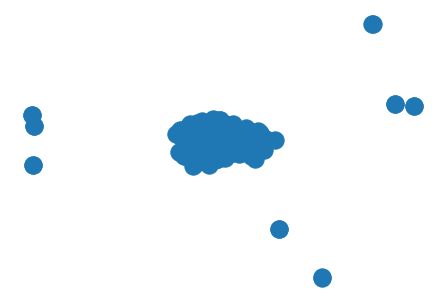

In [11]:
# 1. Visualize networkx graph after MutualInformation from nltk
nx.draw(graph)

In [40]:
# 2. Visualize networkx graph after your own MutualInformation 
import networkx as nx#1


sea=nx.Graph()
for (x,y),score in MutualInformation(words):
    if score>0:
        sea.add_edge(x,y,weight=score)


('Theodore', 'Roosevelt')  5.962619169572323
('Roosevelt', ';')  0.99326691285831
(';', 'An')  4.915532734353745
('An', 'Intimate')  14.029274900402934
('Intimate', 'Biography')  15.836629822460537
('Biography', ',')  2.9666504895605748
(',', 'by')  0.7918016094789772
('by', 'William')  2.7814321342229125
('William', 'Roscoe')  10.978648827332965
('Roscoe', 'Thayer')  13.029274900402934
('Thayer', '1919')  11.029274900402934
('1919', 'PREFACE')  13.836629822460537
('PREFACE', 'In')  9.52374686717618
('In', 'finishing')  8.52374686717618
('finishing', 'the')  3.115958035634981
('the', 'correction')  3.5309955349138247
('correction', 'of')  3.4026532480445617
('of', 'the')  2.244223885440079
('the', 'last')  2.7115677805556455
('last', 'proofs')  10.344776726130862
('proofs', 'of')  3.9876157487657182
('of', 'this')  1.3151904067942224
('this', 'sketch')  7.3568495584314375
('sketch', ',')  1.3816879888394185
(',', 'I')  1.3959018480591194
('I', 'perceive')  5.856490244821379
('perceive'

('lawyers', 'and')  3.622310701659771
('the', 'accomplices')  4.115958035634981
('accomplices', 'in')  6.018846700686003
('the', 'lobby')  3.115958035634981
('lobby', 'and')  4.207273202380927
('and', 'in')  0.03334627038111841
('in', 'Congress')  3.0188467006860034
('Congress', 'would')  2.362924072841121
('have', 'it')  0.03699404739626283
('it', 'known')  2.09284728212978
('known', 'that')  3.3627718978458967
('that', 'he')  3.4394502288997884
('he', 'used')  4.017819424613642
('used', 'every')  5.3936863266118085
('every', 'means')  5.122384304794414
('means', ',')  0.42232997333676464
(',', 'fair')  2.9666504895605748
('fair', 'and')  4.207273202380927
('and', 'foul')  3.622310701659771
('foul', ',')  2.3816879888394182
('to', 'prevent')  4.476855309139652
('prevent', 'depriving')  12.58870230901695
('depriving', 'the')  4.115958035634981
('packers', 'of')  3.4026532480445617
('the', 'privilege')  2.7940299407476186
('privilege', 'of')  3.6656876538783556
('of', 'canning')  4.9876

('FOREIGN', 'POLICY')  15.836629822460537
('POLICY', 'XII')  14.836629822460537
('XII', '.')  4.909592653740242
('THE', 'GREAT')  12.029274900402934
('GREAT', 'CRUSADE')  15.836629822460537
('CRUSADE', 'AT')  14.251667321739381
('AT', 'HOME')  14.251667321739381
('HOME', 'XIII')  13.836629822460537
('XIII', '.')  4.909592653740242
('THE', 'TWO')  12.029274900402934
('TWO', 'ROOSEVELTS')  14.836629822460537
('ROOSEVELTS', 'XIV')  14.836629822460537
('XIV', '.')  4.909592653740242
('THE', 'PRESIDENT')  11.029274900402934
('PRESIDENT', 'AND')  12.514701727573174
('AND', 'THE')  9.70734680551557
('THE', 'KAISER')  12.029274900402934
('KAISER', 'XV')  14.251667321739381
('XV', '.')  4.324630153019085
('ROOSEVELT', 'AND')  10.514701727573174
('AND', 'CONGRESS')  13.514701727573174
('CONGRESS', 'XVI')  14.836629822460537
('XVI', '.')  4.909592653740242
('THE', 'SQUARE')  12.029274900402934
('SQUARE', 'DEAL')  15.836629822460537
('DEAL', 'IN')  15.836629822460537
('IN', 'ACTION')  15.836629822

('Jimmy', "''")  5.808723825890652
("''", 'became')  2.316870729560977
('became', 'a')  2.404463128984893
('a', 'rabid')  5.896316225314568
('rabid', 'Tory')  16.836629822460537
('Tory', '.')  4.909592653740242
('He', '``')  0.9016029333639514
('``', 'was')  -1.4247512270364504
('was', 'one')  1.4873010736878471
('best', 'men')  3.8703046285722587
('men', 'I')  0.6180855054963006
('have', 'ever')  3.1405316515046735
('ever', 'known')  7.3663098876805035
('known', ',')  0.7187229761169892
("''", 'writes')  7.071758231724446
('writes', 'his')  5.723538839018156
('his', 'nephew')  5.875541932463205
('nephew', 'Theodore')  8.85934989896062
('Theodore', ';')  1.3305702336325882
(';', '``')  2.0086421387452256
('``', 'and')  -1.2439379094514018
('when', 'I')  2.6276715543254987
('have', 'sometimes')  3.777961572119965
('sometimes', 'been')  4.633281819480774
('been', 'tempted')  7.21824432020193
('tempted', 'to')  3.6803887032247844
('to', 'wonder')  1.6803887032247846
('wonder', 'how')  7.0

('know', 'enough')  5.855776216080801
('enough', 'about')  5.181546377262558
('about', 'history')  5.852923629801188
('history', 'to')  1.5104637017824725
('be', 'impressed')  5.025255128950595
('impressed', 'by')  5.054450628629328
('by', 'historic')  6.639413129350484
('historic', 'places')  13.251667321739381
('places', 'and')  2.622310701659771
('and', 'monuments')  5.207273202380927
('monuments', '.')  4.909592653740242
('He', 'kept')  4.926549290494182
('kept', 'a')  2.7919795654998323
('a', 'diary')  5.896316225314568
('diary', 'from')  6.50347447214992
('which', 'Mr.')  1.300200459806585
('Mr.', 'Hagedorn*')  9.360896391494139
('Hagedorn*', 'prints')  16.836629822460537
('prints', 'many')  9.697078470061744
('many', 'amusing')  8.697078470061744
('amusing', 'entries')  14.836629822460537
('entries', ',')  3.9666504895605748
('of', 'which')  -0.26572526086423165
('which', 'I')  2.298294653663009
('I', 'quote')  7.856490244821379
('quote', ':')  7.220080978681547
(':', '*')  4.11

('interest', 'in')  4.330790707000744
('.', 'On')  4.73125541248173
('On', 'getting')  7.950933449121141
('getting', 'home')  7.984880781044479
('was', 'fifteen')  3.8040674634594307
('fifteen', 'years')  8.548148210666316
('years', 'old')  6.285113804832522
('old', ',')  0.48122366239033304
(',', 'set')  -1.4256669332181855
('set', 'to')  0.8730337811671806
('to', 'work')  2.2329297262535635
('work', 'seriously')  7.759814225409706
('seriously', 'to')  3.6803887032247844
('to', 'fit')  4.265351203945941
('fit', 'himself')  6.64680526358052
('himself', 'to')  2.5349582637032206
('to', 'enter')  4.528385609779735
('enter', 'Harvard')  9.759814225409706
('Harvard', 'College')  9.62231070165977
('College', '.')  1.4501610351029448
('.', 'Up')  4.909592653740242
('Up', 'to')  5.265351203945941
('to', 'this')  0.8730337811671808
('this', 'time')  4.307606039411588
('time', 'his')  -0.7586640872777995
('his', 'education')  4.138576338297
('education', 'had')  4.648968456721415
('been', 'unme

('camped', 'out')  9.427238886322835
('out', ',')  -0.12081235168976456
('there', 'he')  0.3587872495131395
('he', 'met')  3.8589921320546607
('met', 'Bill')  7.819821534773983
('Bill', 'Sewall')  12.806882479066484
('Sewall', ',')  2.159295567502971
('a', 'famous')  2.726391223872255
('famous', 'guide')  11.344776726130862
('guide', ',')  1.6447223946732124
('who', 'remained')  5.281881106519798
('remained', 'Theodore')  6.1963848862381905
("'s", 'friend')  3.2421885758513156
('friend', 'through')  5.253076891994052
('through', 'life')  4.312455439072983
('and', 'Wilmot')  5.207273202380927
('Wilmot', 'Dow')  14.836629822460537
('Dow', ',')  2.9666504895605748
(',', 'Sewall')  1.1592955675029708
('Sewall', "'s")  5.389029964180587
("'s", 'nephew')  6.611422385517034
('nephew', ',')  2.3816879888394182
(',', 'another')  -1.6480593545546334
('another', 'woodsman')  11.221919978345328
('woodsman', ';')  7.7228876564113484
('and', 'this')  0.9754204517954129
('this', 'trip')  5.3568495584

('Sunday', 'School')  13.251667321739381
('School', 'at')  5.207273202380927
('at', 'Christ')  7.792235703102083
('Christ', 'Church')  16.836629822460537
('Church', ',')  3.9666504895605748
('was', 'so')  2.5732872566302634
('so', 'muscular')  7.991139771516162
('muscular', 'a')  4.896316225314568
('a', 'Christian')  5.896316225314568
('Christian', 'that')  5.28877131640212
('the', 'decorous')  4.115958035634981
('decorous', 'vestrymen')  15.836629822460537
('vestrymen', 'thought')  9.749166981210198
('thought', 'him')  2.3166250808219386
('him', 'an')  0.3379987316145056
('an', 'unwise')  8.770540632002763
('unwise', 'guide')  14.514701727573174
('guide', 'in')  3.6969186057986407
('in', 'piety')  5.018846700686003
('piety', '.')  3.9095926537402423
('.', 'For')  4.739667652297929
('For', 'one')  3.2206554143016746
('one', 'day')  2.8796184964666076
('day', 'a')  0.06342621114982612
('boy', 'came')  5.70734680551557
('to', 'class')  0.6803887032247846
('class', 'with')  4.455086871275

('working', 'to')  1.4579962818883367
('to', 'earn')  3.6803887032247844
('earn', 'his')  4.875541932463205
('his', 'bread')  5.460504433184362
('bread', 'and')  5.207273202380927
('and', 'butter')  5.207273202380927
('butter', '--')  9.129270690379654
('the', 'motive')  2.115958035634981
('motive', 'which')  4.190971390051827
('which', 'determines')  6.190971390051827
('determines', 'most')  8.70734680551557
('most', 'young')  3.3497948008974863
('men', 'when')  2.7844438919184205
('they', 'start')  4.144668258243749
('start', 'in')  2.318406982544911
('in', 'life')  0.7089914380992162
("'s", 'example')  5.196384886238191
('example', ',')  1.9666504895605745
(',', 'reinforced')  3.9666504895605748
('reinforced', 'by')  7.639413129350484
('by', 'wholesome')  6.054450628629328
('wholesome', 'advice')  12.666704821018223
('advice', ',')  2.9666504895605748
(',', 'quickened')  2.9666504895605748
('quickened', 'in')  5.018846700686003
('Theodore', 'his')  0.06818701040560184
('his', 'sense

('There', 'are')  5.594348872158093
('are', 'also')  3.774921117799914
('also', 'several')  5.1748517246885495
('several', 'others')  6.966265102877132
('others', 'which')  4.490531671910735
('which', 'were')  2.5599964915738345
('were', 'doubtless')  5.450767421819076
('doubtless', 'of')  2.4026532480445617
('of', 'more')  -0.9112375277773822
('more', 'political')  2.7089578554215556
('political', 'value')  7.0228486312435
('value', 'to')  3.0954262025036283
('the', 'aspirant')  3.115958035634981
('aspirant', 'to')  4.265351203945941
('to', 'office')  0.5374307493827417
('office', 'in')  3.0982811681804083
('in', '1881')  4.433884199964847
('.', 'Just')  4.909592653740242
('Just', 'after')  6.917766585185942
('the', 'election')  3.161761725248106
('election', 'Roosevelt')  2.152812768520623
('Roosevelt', 'wrote')  3.5834471228504854
('wrote', 'to')  2.549144169946532
('his', 'classmate')  5.460504433184362
('classmate', ',')  2.9666504895605748
(',', 'Charles')  1.0921813716444337
(':

('courage', 'that')  1.6449151266273954
('that', 'act')  2.1188463149598076
('act', 'is')  4.64433700798977
('is', 'probably')  3.907371413823564
('probably', 'supreme')  9.929739226852018
('supreme', 'in')  4.018846700686003
('in', 'Roosevelt')  -0.125811542145879
("'s", 'life')  3.62349521781761
('life', 'thus')  5.6938845457090075
('thus', 'far')  7.973992464901743
('far', '.')  -0.7051171903749662
('He', 'must')  1.9864918309504642
('have', 'expected')  5.48845495492498
('expected', 'failure')  13.377198203823239
('failure', '.')  4.909592653740242
('Even', 'his')  3.7600647150432702
('youth', 'and')  1.1198103611305876
('and', 'idealism')  4.622310701659771
('idealism', 'and')  4.622310701659771
('and', 'ignorance')  3.207273202380927
('ignorance', 'of')  3.9876157487657182
('of', 'public')  0.7949706708233223
('public', 'affairs')  6.666704821018224
('affairs', 'could')  4.437886130522343
('not', 'blind')  5.144886303289262
('blind', 'him')  5.404087922072278
('the', 'apparently'

('still', 'thought')  4.55934242233018
('was', 'stubborn')  5.611422385517034
('stubborn', 'and')  4.207273202380927
('too', 'conceited')  9.41036506775844
('conceited', 'to')  4.265351203945941
('to', 'listen')  4.265351203945941
('listen', 'to')  4.265351203945941
('to', 'reason')  0.8059195853086435
('reason', ',')  1.5072188709232774
('in', 'reality')  4.2114917786284
('reality', 'he')  3.2610905756260062
('few', 'intimates')  8.444312399681776
('intimates', 'like')  7.603010145700835
('like', 'Billy')  9.41036506775844
("O'Neil", 'and')  4.207273202380927
('and', 'Mike')  5.207273202380927
('Mike', 'Costello')  16.836629822460537
('Costello', 'with')  7.4550868712759515
('took', 'counsel')  7.158910180819528
('counsel', ',')  2.3816879888394187
('a', 'group')  3.726391223872255
('group', 'of')  4.277122365960703
('of', 'thirty')  1.6656876538783558
('thirty', 'or')  4.6259584786749155
('or', 'forty')  4.777961572119965
('forty', 'others')  8.966265102877133
('both', 'Republican') 

('North', ':')  5.220080978681547
('write', 'you')  6.537421804073258
('you', 'a')  -1.2329667916303988
('few', 'words')  8.081742320297069
('words', 'just')  6.437886130522344
('just', 'to')  1.2064575148923726
('thank', 'you')  8.70734680551557
('you', 'for')  -0.07401290800908943
('your', 'kindness')  11.792235703102083
('kindness', 'towards')  11.749166981210198
('towards', 'me')  5.463764762347949
('me', ',')  1.1406798893356238
('to', 'assure')  5.265351203945941
('assure', 'you')  8.122384304794414
('you', 'that')  0.15948829945715345
('that', 'my')  0.3818807207936015
('my', 'head')  6.1748517246885495
('head', 'will')  5.223761325169496
('will', 'not')  3.28690530816169
('be', 'turned')  2.9663614398970264
('turned', 'by')  3.99555693957576
('by', 'what')  2.4299597637215347
('I', 'well')  2.1285697902581804
('well', 'know')  5.5541205162197
('know', 'was')  1.0568335338393973
('a', 'mainly')  4.3113537245934115
('mainly', 'accidental')  14.251667321739381
('accidental', 'succ

('bribes', 'from')  7.088436972871077
('from', 'unscrupulous')  5.766508877983714
('unscrupulous', 'interests')  10.122384304794414
('interests', '.')  2.5172752309614816
('committee', 'meetings')  11.666704821018223
('the', 'incessant')  2.893565614298533
('incessant', 'parleys')  14.029274900402934
('parleys', 'which')  7.190971390051827
('which', 'prepare')  4.0210463886095145
('prepare', 'the')  0.9460330341926686
('the', 'work')  1.2090674400264625
('a', 'convention')  3.4368846066772702
('Roosevelt', 'fought')  2.647577460270201
('fought', 'unwaveringly')  11.377198203823239
('unwaveringly', 'against')  9.095162836059389
('against', 'Blaine')  5.635731217422093
('element', 'made')  6.842276385601679
('made', 'Senator')  3.594348872158093
('Senator', 'George')  6.303300090154703
('George', 'F.')  9.136190104319445
('F.', 'Edmunds')  12.836629822460537
('Edmunds', 'their')  7.2897353625729
('their', 'candidate')  4.335539052186025
('Roosevelt', 'urged')  4.04811538985393
('urged', 

('hold', ',')  0.2662107714194827
('that', 'delegates')  0.9668432215147577
('delegates', 'can')  4.975542916465143
('in', 'honor')  3.2639591985225347
('honor', 'abandon')  10.081742320297069
('abandon', 'the')  4.115958035634981
('the', 'nominee')  3.7940299407476186
('nominee', 'chosen')  10.607811131964656
('majority', 'in')  0.848921699243691
('they', 'attend')  4.385676357747544
('attend', 'as')  3.547475468737181
('as', 'delegates')  1.6849789924871155
('delegates', '.')  1.5876645588528797
('If', 'the')  1.1159580356349812
('the', 'rule')  1.308603113577377
('My', 'man')  5.999001889289132
('or', 'nobody')  4.48845495492498
('nobody', ',')  0.5072188709232773
('were', 'to')  -0.5355486959743638
('to', 'prevail')  3.265351203945941
('prevail', ',')  1.9666504895605745
('there', 'would')  3.4606207467282544
('be', 'no')  2.5603690802211894
('no', 'use')  4.464853178122612
('use', 'in')  1.696918605798641
('holding', 'conventions')  11.377198203823239
('conventions', 'at')  5.7922

('attractive', 'life')  7.941812059152594
('vigorous', 'young')  6.8941153171212965
('young', 'fellow')  7.086760395063693
('fellow', 'than')  4.93651775948308
('this', ',')  -0.8126900563274329
('and', 'assuredly')  3.207273202380927
('assuredly', 'no')  6.786781273009975
('no', 'one')  3.662659961180788
('else', 'has')  7.229299508710926
('has', 'glorified')  9.136190104319445
('glorified', 'it')  6.340774795573366
('as', 'Roosevelt')  1.0846412658790439
('Roosevelt', 'did')  2.147007146839417
('did', 'with')  -0.5049150607921294
('his', 'pen')  5.460504433184362
('pen', '.')  3.9095926537402423
('At', 'one')  4.62504566938101
('one', 'time')  3.4933399901691873
('time', 'or')  0.7287180531001158
('or', 'another')  2.3331767294470693
('another', 'he')  0.45373565356840195
('he', 'performed')  5.06844549768361
('performed', 'all')  7.676758485682147
('the', 'duties')  2.0004808182150455
('duties', 'of')  2.287176030624626
('ranchman', '.')  2.9095926537402423
('He', 'went')  3.2512760

('a', 'faint')  5.896316225314568
('faint', '.')  3.324630153019086
('could', 'recover')  8.607811131964656
('recover', ',')  2.9666504895605748
('Roosevelt', 'stood')  2.5834471228504854
('stood', 'over')  5.382330528840638
('over', 'him')  2.058313085230548
('him', 'ready')  3.3166250808219386
('to', 'pound')  5.265351203945941
('pound', 'him')  7.404087922072278
('him', 'again')  2.0465359174541944
('again', '.')  2.3593955711797623
('bully', 'did')  6.291665389671299
('not', 'stir')  4.337531381231658
('stir', ',')  1.1592955675029708
('was', 'carried')  2.96756619574231
('carried', 'off')  6.49233391454472
('off', 'into')  5.245419174074203
('into', 'another')  4.74618654737893
('another', 'room')  7.414565056287724
('room', '.')  2.1022377316826377
('The', 'crowd')  4.935763014479789
('crowd', 'congratulated')  13.836629822460537
('congratulated', 'the')  4.115958035634981
('the', 'stranger')  3.115958035634981
('stranger', 'on')  6.612628148262432
('on', 'having')  1.80527322620

('their', 'pioneers')  6.2897353625729
('pioneers', 'and')  3.207273202380927
('and', 'exiles')  5.207273202380927
('exiles', 'from')  8.088436972871076
('from', 'civilization')  3.766508877983714
('from', 'studying')  6.50347447214992
('studying', 'the')  4.115958035634981
('the', 'depths')  3.5309955349138247
('depths', 'of')  4.402653248044562
('own', 'nature')  6.034113457339314
('nature', '.')  2.2466276410178128
('CHAPTER', 'V.')  11.192773632685812
('LITERATURE', 'One')  10.978648827332965
('One', 'September')  9.17129390527536
('September', 'day')  8.19638488623819
('day', 'in')  2.5078847814086243
('in', '1886')  5.2114917786284
('1886', ',')  3.744258068224127
('was', 'reading')  3.8040674634594307
('reading', 'a')  4.088961303256964
('a', 'New')  0.6868628596856179
('York', 'newspaper')  6.984880781044479
('newspaper', 'in')  3.211491778628399
('his', 'Elkhorn')  4.138576338297
('Elkhorn', 'cabin')  12.514701727573174
('cabin', ',')  1.9666504895605745
('nominated', 'by')  6

('years', 'later')  7.50750622616897
('later', ',')  2.703616083726781
('``', 'Winning')  6.800456209907051
('Winning', 'of')  4.987615748765718
('West', "''")  3.808723825890652
("''", 'made')  0.3993328897529502
('second', 'excursion')  12.58870230901695
('excursion', 'into')  9.360896391494139
('into', 'history')  6.190971390051827
('These', 'volumes')  10.514701727573174
('volumes', ',')  2.9666504895605748
('which', 'eventually')  6.190971390051827
('eventually', 'numbered')  15.836629822460537
('numbered', 'six')  12.929739226852018
('are', 'regarded')  4.774921117799914
('by', 'experts')  6.317485034463122
('experts', 'in')  3.6969186057986407
('the', 'subject')  2.308603113577377
('subject', 'as')  4.199552165316874
('of', 'great')  0.34375955899099325
('great', 'value')  6.437886130522343
('value', ',')  0.7967254881182624
('I', 'suppose')  6.271527744100223
('them', 'Roosevelt')  -0.1456563535427504
('did', 'more')  1.392812113128199
('other', 'writer')  7.148379513327359
('w

('household', 'words')  12.081742320297069
('words', '.')  1.1547051515767734
('even', 'remembered')  6.759814225409706
('remembered', 'from')  5.088436972871077
('his', 'extensive')  6.460504433184362
('extensive', 'reading')  14.029274900402934
('reading', 'some')  6.899991883457966
('some', 'item')  8.70734680551557
('item', 'which')  6.190971390051827
('when', 'applied')  5.563417012606203
('applied', 'by')  4.179981510713187
('the', 'affair')  3.115958035634981
('affair', 'of')  1.9876157487657182
('the', 'moment')  2.656526416997684
(',', 'acquired')  1.6447223946732124
('acquired', 'new')  8.49233391454472
('new', 'pertinence')  10.814262009432083
('pertinence', 'and')  5.207273202380927
('a', 'second')  2.648388711870982
('second', 'life')  5.6938845457090075
('Thus', ',')  3.481223662390333
(',', 'Bunyan')  3.9666504895605748
('Bunyan', "'s")  8.19638488623819
('``', 'muckraker')  7.800456209907051
('muckraker', "''")  7.808723825890652
("''", 'lives')  3.3492922072533546
('li

('had', 'gone')  5.970896551608778
('gone', 'up')  6.336783935377332
('the', 'Matterhorn')  4.115958035634981
('Matterhorn', 'and')  5.207273202380927
('and', 'Mont')  5.207273202380927
('Mont', 'Blanc')  16.836629822460537
('Blanc', ',')  3.9666504895605748
(',', 'feats')  2.3816879888394182
('which', 'still')  1.0011468311718092
('required', 'endurance')  10.344776726130862
('not', 'involve')  5.822958208401899
('involve', 'danger')  10.607811131964656
('While', 'we')  5.069686881704751
('we', 'think')  4.665296626625416
('think', 'of')  2.6656876538783556
('as', 'dedicating')  7.006907087374478
('dedicating', 'himself')  9.64680526358052
('his', 'literary')  4.460504433184362
('literary', 'work')  8.344776726130862
('work', '--')  2.637417594049979
('accounts', 'of')  3.4026532480445617
('of', 'ranch')  2.8176907473234056
('ranch', 'life')  7.7718870577102805
('life', '--')  2.23445292707171
('--', 'we')  1.449790590874208
('we', 'must')  6.434683698483999
('must', 'remember')  7.14

('Johnson', 'told')  8.814262009432083
('told', 'Boswell')  11.136190104319445
('Boswell', 'that')  6.28877131640212
('``', 'patriotism')  4.10001649176596
('patriotism', 'is')  5.11382229129099
('last', 'refuge')  9.759814225409706
('refuge', 'of')  3.4026532480445617
('a', 'scoundrel')  5.896316225314568
('scoundrel', ',')  3.9666504895605748
('not', 'sounded')  5.144886303289262
('sounded', 'the')  2.115958035634981
('the', 'possibilities')  2.5309955349138247
('possibilities', 'of')  3.4026532480445617
('``', 'reform')  4.10001649176596
('reform', '.')  3.2091529355991497
('first', 'administration')  8.063490615740845
('of', 'President')  -0.6144202653143798
('President', 'Cleveland')  7.012201387043991
('great', ',')  -2.262168200935306
(',', 'irremovable')  3.9666504895605748
('irremovable', 'block')  14.514701727573174
('block', 'of')  2.6656876538783556
('of', 'stubbornness')  3.9876157487657182
('stubbornness', 'in')  5.018846700686003
('in', 'whatever')  1.931383859435664
('w

('to', 'account')  2.6803887032247844
('account', ',')  0.38168798883941846
('was', 'simply')  2.363494872073449
('simply', 'endeavoring')  12.58870230901695
('endeavoring', 'to')  5.265351203945941
('to', 'right')  -0.12696621883281944
('right', 'a')  0.5039988025358072
('great', 'wrong')  5.907371413823563
('wrong', 'which')  3.4905316719107344
('Commission', 'had')  3.5114649329714807
('had', 'committed')  4.648968456721415
('committed', '.')  1.5876645588528797
('But', 'neither')  5.061842762859363
('neither', 'then')  5.712508510631349
('then', 'nor')  4.838039392715208
('nor', 'afterwards')  9.377198203823239
('afterwards', 'did')  6.876627890392456
('he', 'furnish')  3.2610905756260062
('furnish', '``')  4.993101287849448
('``', 'any')  0.1000164917659593
('any', 'clue')  9.136190104319445
('clue', 'to')  5.265351203945941
('the', 'identity')  3.115958035634981
('identity', 'of')  3.9876157487657182
('that', 'child')  3.7038088156809637
('child', 'of')  2.4026532480445617
('his'

(',', 'Republicans')  -0.7057748524109209
('Republicans', 'and')  1.1198103611305876
('and', 'Democrats')  1.3003826067724085
('Democrats', 'alike')  9.607811131964656
('the', 'final')  2.656526416997684
('final', 'profiters')  13.377198203823239
('profiters', 'from')  8.088436972871076
('from', 'police')  5.50347447214992
('police', 'blackmail')  11.929739226852018
('blackmail', 'and')  2.8853451074935648
('and', 'bribery')  5.207273202380927
('bribery', '.')  4.909592653740242
('As', 'he')  2.0460776846551556
('his', 'mandate')  5.460504433184362
('mandate', 'from')  8.088436972871076
('a', 'Reform')  4.088961303256964
('Reform', 'Administration')  8.569843281765635
('Administration', ',')  1.8291469658106398
('might', 'expect')  7.537421804073258
('expect', 'to')  3.680388703224785
('be', 'aided')  7.610217629671751
('aided', 'by')  7.639413129350484
('by', 'it')  -0.8564418975366864
('it', 'on')  0.43870121626262326
('political', 'side')  5.548917442911088
('side', ';')  4.66399396

('would', 'help')  3.625958478674915
('help', 'them')  4.262036295122925
('Roosevelt', 'bethought')  6.107009078907498
('bethought', 'him')  7.404087922072278
('a', 'device')  5.896316225314568
('device', 'which')  7.190971390051827
('which', 'worked')  3.2840807944433084
('worked', 'perfectly')  9.344776726130862
('perfectly', '.')  1.3246301530190856
('He', 'summoned')  6.767851544475124
('summoned', 'forty')  12.081742320297069
('forty', 'of')  1.8176907473234056
('best', 'Jewish')  10.108709367897337
('Jewish', 'policemen')  15.836629822460537
('policemen', 'on')  7.612628148262432
('Force', 'and')  3.207273202380927
('ordered', 'them')  6.583964390010288
('to', 'preserve')  5.265351203945941
('preserve', 'order')  9.792235703102083
('order', 'in')  0.5594150820487059
('the', 'hall')  3.115958035634981
('hall', 'and')  3.207273202380927
('and', 'prevent')  1.9593456889373417
('prevent', 'Ahlwardt')  10.58870230901695
('being', 'interrupted')  8.681811713408432
('interrupted', 'or')

('sale', 'of')  4.987615748765718
('of', 'liquor')  2.180260826708114
('to', 'minors')  4.680388703224785
('minors', '.')  3.324630153019086
('this', 'ordinance')  6.7718870577102805
('ordinance', 'was')  5.026459884795878
('so', 'completely')  7.669211676628799
('completely', 'unobserved')  14.514701727573174
('unobserved', 'that')  6.28877131640212
('large', 'proportion')  10.759814225409706
('proportion', 'of')  4.402653248044562
('common', 'drunks')  11.929739226852018
('drunks', 'brought')  11.2820409707829
('brought', 'before')  6.07258760515395
('Police', 'Court')  8.607811131964656
('Court', 'were')  4.713801827652869
('were', 'lads')  8.035729922540233
('lads', 'and')  5.207273202380927
('even', 'young')  3.4022622207916218
('young', 'girls')  8.15714972295509
('girls', ',')  1.6447223946732124
('the', 'bar-tenders')  4.115958035634981
('bar-tenders', 'sold')  15.836629822460537
('sold', 'with')  6.4550868712759515
('with', 'impunity')  7.4550868712759515
('impunity', '.')  2.

('Charles', 'D.')  8.917766585185943
('D.', 'Sigsbee')  13.377198203823239
('Sigsbee', ',')  3.9666504895605748
('the', 'commander')  3.5309955349138247
('commander', ',')  2.3816879888394182
('were', 'rescued')  7.035729922540232
('rescued', '.')  3.9095926537402423
('The', 'next')  4.765838013037476
('next', 'morning')  9.966265102877133
('morning', 'the')  0.4155183174938891
('newspapers', 'carried')  9.192773632685812
('carried', 'the')  -0.5278981541397434
('the', 'report')  1.7940299407476186
('report', 'to')  3.9434231090585787
('whole', 'world')  7.885345107493564
('world', '.')  1.450161035102945
('A', 'tidal')  10.749166981210198
('tidal', 'wave')  16.836629822460537
('wave', 'of')  4.987615748765718
('of', 'anger')  1.9876157487657182
('anger', 'surged')  13.836629822460537
('surged', 'over')  9.90589248489765
('over', 'this')  3.011074721589707
('``', 'That')  3.478528115019689
('That', 'means')  6.385418710628207
('means', 'war')  5.899991883457966
('war', '!')  5.24791518

('sports', 'men')  6.790870161077854
(',', 'mingled')  2.9666504895605748
('mingled', 'with')  6.4550868712759515
('society', 'sports')  11.029274900402934
('sports', ',')  2.159295567502971
('former', 'football')  11.836629822460537
('football', 'players')  15.836629822460537
('players', 'and')  5.207273202380927
('and', 'oarsmen')  5.207273202380927
('oarsmen', ',')  3.9666504895605748
(',', 'polo-players')  3.9666504895605748
('polo-players', 'and')  5.207273202380927
('and', 'lovers')  5.207273202380927
('lovers', 'of')  4.987615748765718
('adventure', 'from')  5.50347447214992
('great', 'Eastern')  7.0228486312435
('Eastern', 'cities')  11.081742320297069
('cities', '.')  1.7396676522979297
('all', 'had')  -1.1889747851696113
('had', 'one')  -1.1532247602204095
('one', 'quality')  4.712508510631349
('quality', 'in')  3.0188467006860034
('in', 'common')  1.1119561050774849
('common', '--')  4.222380094771135
('--', 'courage')  4.4854145006049295
('courage', '--')  4.485414500604929

('the', 'tactics')  4.115958035634981
('tactics', 'of')  4.987615748765718
('that', 'day')  2.0408438029585345
('also', '--')  2.637417594049979
('far', 'more')  4.738104201081072
('important', '--')  4.041807849129315
('learned', 'how')  6.833814806853483
('how', 'disasters')  10.58870230901695
('disasters', 'and')  5.207273202380927
('waste', 'of')  2.8176907473234056
('and', 'treasure')  4.207273202380927
('treasure', ',')  2.9666504895605748
('the', 'ignominy')  4.115958035634981
('ignominy', 'of')  4.987615748765718
('a', 'disgracefully')  5.896316225314568
('disgracefully', 'managed')  13.377198203823239
('managed', 'campaign')  7.950933449121141
('sprang', 'directly')  11.836629822460537
('directly', 'from')  5.088436972871077
('from', 'unpreparedness')  8.088436972871076
('unpreparedness', '.')  4.909592653740242
('This', 'burned')  9.770540632002763
('burned', 'indelibly')  15.836629822460537
('indelibly', 'into')  9.360896391494139
('his', 'memory')  4.138576338297
('memory',

('was', 'perfectly')  3.0264598847958784
('perfectly', 'polite')  11.251667321739381
('polite', 'while')  9.192773632685812
('while', 'Platt')  5.437886130522344
('Platt', 'let')  6.437886130522344
('let', 'loose')  10.607811131964656
('loose', 'his')  3.875541932463206
('his', 'fury')  4.460504433184362
('fury', ';')  5.7228876564113484
('they', 'parted')  7.845107976384841
('parted', 'Platt')  11.081742320297069
('Platt', 'understood')  5.994279479046729
('understood', 'which')  2.103508548801487
('was', 'master')  5.611422385517034
('master', '.')  3.9095926537402423
('The', 'Governor')  2.8696738240220157
('Governor', 'appointed')  6.448612537115402
('appointed', 'Colonel')  8.055270108935877
('Colonel', 'Partridge')  11.377198203823239
('Partridge', 'to')  5.265351203945941
('position', 'and')  0.7478415837436296
('had', 'chiefly')  3.800971550166466
('chiefly', 'to')  2.0954262025036283
('do', 'with')  2.627267846658632
('the', 'canals')  3.5309955349138247
('canals', 'of')  3.40

('publication', 'in')  6.018846700686003
('Sun', 'this')  6.034921463544074
('this', 'morning')  4.656409840290345
('to', 'begin')  2.6803887032247844
('begin', 'the')  1.5309955349138247
('the', 'conversation')  3.5309955349138247
('conversation', ',')  1.3816879888394185
('just', 'a')  0.25246003553984303
('a', 'line')  1.6483887118709821
('line', 'or')  3.699959060118692
('two', 'now')  3.781008447678829
('not', 'speak')  3.621324347232249
('confidence', 'I')  4.856490244821379
('have', 'in')  -1.2849340474910997
('the', 'judgment')  0.4155183174938891
('judgment', 'of')  1.2871760306246258
('of', 'you')  -1.1416672681792486
('you', 'and')  -0.3370473138428832
(',', 'yet')  0.2662107714194827
('yet', 'I')  3.1560505266802874
('I', 'ca')  6.271527744100223
('ca', "n't")  12.444312399681776
("n't", 'help')  8.122384304794414
('help', 'feeling')  8.929739226852018
('feeling', 'more')  5.767851544475124
('more', 'that')  -1.1950444608621367
('Presidency', 'is')  4.814262009432082
('not'

('Vice-President', ';')  3.635424815161009
('he', 'connived')  4.483482996962454
('with', 'Quay')  4.13315877638859
('Quay', 'to')  1.9434231090585785
('to', 'steer')  3.6803887032247844
('steer', 'the')  2.5309955349138247
('the', 'Pennsylvania')  1.415518317493889
('Pennsylvania', 'delegation')  10.814262009432083
('delegation', 'in')  3.6969186057986407
('same', 'direction')  8.836629822460537
('The', 'delegates')  2.6138349195924255
('delegates', 'met')  7.3052483619442246
('met', 'and')  -0.002180163248022652
('and', 'renominated')  3.622310701659771
('renominated', 'McKinley')  10.444312399681776
('McKinley', 'as')  2.1995521653168737
('course', '.')  -0.044603656646633384
('with', 'irresistible')  5.870124370554795
('irresistible', 'pressure')  15.251667321739381
('pressure', ',')  3.9666504895605748
('they', 'insisted')  3.675182974942529
('on', 'nominating')  6.612628148262432
('nominating', 'Roosevelt')  5.107009078907498
('.', 'Swept')  4.909592653740242
('Swept', 'off')  11

('shoes', '.')  4.909592653740242
('He', 'has')  1.6523743270551883
('has', 'a')  1.517804602060838
('of', 'destiny')  3.4026532480445617
('destiny', 'behind')  11.003739808295794
("''", 'Destiny')  7.808723825890652
('Destiny', 'is')  8.814262009432083
('one', 'artificer')  8.712508510631348
('artificer', 'who')  7.944846119242227
('who', 'can')  3.7276154030215576
('can', 'use')  5.975542916465143
('use', 'all')  4.354830390794785
('all', 'tools')  6.091795984960991
('who', 'finds')  5.944846119242227
('finds', 'a')  3.8963162253145676
('short', 'cut')  10.029274900402934
('cut', 'to')  1.4579962818883367
('his', 'goal')  4.460504433184362
('goal', 'through')  8.207273202380927
('through', 'ways')  6.399918280323323
('ways', 'mysterious')  12.029274900402934
('mysterious', 'and')  4.207273202380927
('most', 'devious')  9.70734680551557
('devious', '.')  4.909592653740242
('before', 'remarked')  6.135323360501912
('commonplace', 'could')  5.437886130522343
('could', 'happen')  7.02284

('these', 'masses')  6.164204480489041
('masses', 'of')  3.4026532480445617
('of', 'foreigners')  3.9876157487657182
('foreigners', 'quick')  11.136190104319445
('quick', 'and')  2.506833484239835
('and', 'unscrutinized')  5.207273202380927
('unscrutinized', 'naturalization')  15.836629822460537
('naturalization', 'as')  6.006907087374478
('as', 'American')  -0.3594151268713378
('citizens', '.')  2.822129812489903
('it', 'fell')  4.75581229485221
('fell', 'out')  6.842276385601679
('out', 'that')  1.4643428809855743
('that', 'before')  0.494355450052014
('century', 'a')  1.7263912238722552
('great', 'gulf')  9.0228486312435
('gulf', 'was')  5.026459884795878
('was', 'opening')  4.611422385517034
('opening', 'between')  9.377198203823239
('between', 'Labor')  8.055270108935877
('Labor', 'and')  3.1077375288300124
('and', 'Capital')  3.069769678630992
('Capital', '.')  2.4501610351029446
('Now', 'a')  1.3113537245934115
('community', 'can')  6.975542916465143
('can', 'thrive')  10.297471

('fought', 'to')  2.3908820860297997
('maintain', 'the')  1.1159580356349812
('gold', 'standard')  10.514701727573174
('the', 'financial')  1.5309955349138247
('financial', 'honesty')  9.929739226852018
('honesty', 'of')  2.6656876538783556
('showed', 'very')  5.369024272377539
('very', 'plainly')  7.953986773098696
('plainly', 'that')  5.873733817123276
('no', 'prejudice')  7.201818772288819
('prejudice', 'against')  8.510200335338233
('against', 'free')  6.188272240450871
('free', 'silver')  11.929739226852018
('silver', ',')  2.9666504895605748
('was', 'only')  1.3540345428243827
('only', 'at')  1.5348478604094316
('moment', 'that')  1.2443771970436663
('Republican', 'managers')  6.4061772707950055
('managers', 'could')  5.285883037077293
('could', 'persuade')  6.285883037077293
('persuade', 'him')  6.082159827184915
('firm', 'stand')  9.666704821018225
('stand', 'for')  2.8853451074935648
('for', 'gold')  4.733342014048515
('gold', '.')  2.5876645588528797
('*', 'In')  4.0974821124

('and', 'squarely')  4.207273202380927
('squarely', 'in')  5.018846700686003
('in', 'deciding')  5.018846700686003
('deciding', 'the')  3.115958035634981
('matter', ';')  3.5134342907823988
('but', 'if')  2.727615403021557
('he', 'appointed')  1.746517402796248
('appointed', 'a')  1.5743881304272052
('settle', 'up')  6.529429013319727
('up', 'all')  1.176912598598942
('these', 'questions')  5.842276385601679
('questions', ',')  2.059759893952056
('I', 'certainly')  4.686565243379067
('certainly', 'should')  6.381302602155976
('expect', 'him')  4.234162920629966
('appoint', 'three')  8.87084553779845
('could', 'find')  3.963954942189931
('find', 'them')  3.9401082002355636
('Orkneys', 'the')  3.115958035634981
('question', 'was')  2.1519907668797376
('an', 'open')  5.711646942949196
('open', 'one')  4.068652320856624
('make', 'one')  3.173349699523318
('one', 'last')  3.2206554143016746
('last', 'effort')  9.344776726130862
('effort', 'to')  4.850313704667097
('bring', 'about')  6.43788

('glad', ',')  0.7967254881182624
('they', 'sent')  3.418843221682743
('sent', 'an')  3.3442758773006664
('an', 'accredited')  7.770540632002764
('accredited', 'agent')  14.836629822460537
('agent', ',')  2.9666504895605748
(',', 'Dr.')  2.3816879888394187
('Dr.', 'Herran')  11.122384304794414
('Herran', ',')  2.159295567502971
('who', 'framed')  5.35988361852107
('framed', 'with')  4.870124370554795
('with', 'Secretary')  1.8403770271607434
('Hay', 'a')  0.6483887118709821
('treaty', 'satisfactory')  11.16420448048904
('satisfactory', 'to')  3.6803887032247844
('and', 'believed')  -0.5740865111437323
('Mr.', 'Hay')  5.112968878050554
('sincere', 'intentions')  11.136190104319445
('Colombian', 'Government')  9.759814225409706
('Government', 'at')  3.3003826067724082
('at', 'Bogota')  6.207273202380927
('Bogota', '.')  3.324630153019086
('The', 'Colombian')  5.350800513758632
('Colombian', 'politicians')  9.551227603598289
('were', 'banditti')  8.035729922540233
('banditti', 'of')  4.98

('Secondly', ',')  3.9666504895605748
('rebellion', 'and')  4.207273202380927
('and', 'restored')  4.207273202380927
('restored', 'Panama')  11.377198203823239
('to', 'Colombia')  1.8059195853086436
('Colombia', ';')  4.263456037774051
('this', 'would')  0.46810630953317767
('been', 'to')  -2.7680717975915097
('to', 'subject')  1.4579962818883367
('subject', 'them')  4.776609467952684
('them', 'against')  1.8424974036091413
('against', 'their')  2.548268376171753
('their', 'will')  1.4317543674453277
('will', 'to')  -1.5926297911816312
('a', 'foreign')  2.8374225362609997
('foreign', 'enemy')  8.285883037077294
('enemy', '--')  5.222380094771135
('--', 'an')  2.0631814999218814
('an', 'enormity')  7.770540632002764
('enormity', 'the')  3.115958035634981
('Anti-Imperialists', 'were')  7.035729922540232
('still', 'decrying')  10.64680526358052
('decrying', 'in')  6.018846700686003
('our', 'holding')  6.037348200938615
('holding', 'the')  1.6565264169976839
('Philippines', 'against')  6.7

('he', 'explained')  4.06844549768361
('explained', 'the')  2.115958035634981
('the', 'reasonableness')  4.115958035634981
('reasonableness', 'of')  4.987615748765718
('his', 'measures')  3.29057943174205
('measures', ';')  4.552962654969036
('the', 'satraps')  4.115958035634981
('satraps', 'of')  4.987615748765718
('Plutocracy', 'so')  5.821214770073849
('far', 'lost')  6.414565056287724
('lost', 'their')  4.482380440515295
('their', 'discretion')  7.2897353625729
('discretion', 'as')  6.006907087374478
('to', 'threaten')  4.265351203945941
('threaten', 'him')  6.404087922072278
('he', 'bluntly')  6.06844549768361
('bluntly', 'challenge')  15.251667321739381
('challenge', 'them')  6.999001889289132
('do', 'their')  1.1399882430682178
('their', 'worst')  5.482380440515295
('worst', '.')  2.1022377316826377
('The', 'Interests')  3.128408092422184
('Interests', 'had')  3.74850413027233
('had', 'undeniably')  6.970896551608778
('undeniably', 'reached')  11.978648827332965
('reached', 'suc

('Boundary', ',')  2.644722394673212
('might', ',')  -1.1626325273843916
('under', 'provocation')  8.479077817842454
('provocation', ',')  3.551612990281731
('have', 'led')  3.699959060118692
('led', 'to')  2.602386191223512
('without', 'striking')  8.0228486312435
('striking', 'a')  3.3113537245934115
('a', 'blow')  3.8963162253145676
('blow', ',')  0.9666504895605746
('he', 'repelled')  5.483482996962454
('repelled', 'the')  3.5309955349138247
('the', 'persistent')  3.115958035634981
('persistent', 'attempts')  13.514701727573174
('attempts', 'of')  2.6656876538783556
('German', 'Emperor')  10.207273202380927
('Emperor', 'to')  2.0954262025036283
('to', 'gain')  4.943423109058578
('gain', 'a')  4.574388130427205
('a', 'foothold')  4.896316225314568
('foothold', 'on')  5.612628148262432
('this', 'continent')  7.356849558431437
('continent', ';')  6.7228876564113484
('repelled', 'those')  8.565166794556163
('those', 'snakelike')  10.150129295277319
('snakelike', 'attacks')  14.51470172

('to', 'refuse')  3.4579962818883367
('refuse', 'nomination')  9.075078590016057
('lower', 'office')  8.52374686717618
('the', 'masses')  3.338350456971429
('country', 'over')  2.850610049396461
(',', 'insisted')  1.7967254881182624
('nominating', 'him')  5.404087922072278
('brief', 'summary')  11.792235703102083
('summary', 'of')  3.4026532480445617
('political', 'progress')  7.385418710628208
('progress', 'assuredly')  12.029274900402934
('assuredly', 'does')  10.444312399681776
('not', 'bear')  5.559923802568106
('bear', 'out')  7.842276385601679
('charge', 'that')  2.481416394344516
('victim', 'of')  3.9876157487657182
('of', 'uncontrollable')  4.987615748765718
('uncontrollable', 'ambition')  13.514701727573174
("'s", 'Ananias')  6.611422385517034
('Club', 'caught')  10.328835182261841
('caught', 'the')  0.4155183174938891
('always', 'favorably')  10.85934989896062
('favorably', '.')  4.909592653740242
('Those', 'whom')  7.929739226852018
('he', 'elected')  1.746517402796248
('ele

('at', 'carrying')  4.091795984960991
('carrying', 'through')  6.506833484239835
('the', 'reforms')  1.5309955349138247
('reforms', 'he')  3.4834829969624543
('He', 'attended')  5.893382426558983
('attended', 'with')  3.995655252638654
('equal', 'keenness')  11.88243351207366
('keenness', 'and')  5.207273202380927
('and', 'solicitude')  5.207273202380927
('solicitude', 'to')  5.265351203945941
('to', 'external')  5.265351203945941
('external', 'improvements')  16.836629822460537
('improvements', '.')  4.909592653740242
('have', 'suggested')  4.48845495492498
('chief', 'duty')  6.7813473869593475
('which', 'concerned')  4.869043295164464
('concerned', 'mostly')  12.929739226852018
('mostly', 'the')  2.5309955349138247
('the', 'establishment')  4.115958035634981
('establishment', 'of')  4.987615748765718
('our', 'insular')  9.496779819575911
('insular', 'dependencies')  16.836629822460537
('dependencies', ',')  3.9666504895605748
('the', 'readjustment')  3.115958035634981
('readjustment'

('Henry', 'of')  0.7396882353221327
('of', 'Prussia')  4.987615748765718
('Prussia', 'came')  10.029274900402934
('a', 'whirlwind')  5.896316225314568
('whirlwind', 'trip')  13.836629822460537
('as', 'Chicago')  2.421944586653322
('Chicago', ';')  3.137925155690192
('in', 'no')  -0.031001848764558124
('no', 'sense')  5.232192421332337
('sense', 'a')  1.3417273736369302
('a', 'royal')  4.896316225314568
('royal', 'progress')  13.029274900402934
('progress', '.')  3.1022377316826377
('.', 'Multitudes')  4.909592653740242
('Multitudes', 'flocked')  14.836629822460537
('flocked', 'to')  4.265351203945941
('of', 'curiosity')  2.9876157487657182
('curiosity', ',')  1.9666504895605745
('but', 'Prince')  5.65361482157778
('Henry', 'realized')  8.88826259087586
('German', 'kin')  10.792235703102083
('kin', 'here')  11.666704821018225
('his', 'mission')  5.460504433184362
('mission', 'had')  5.970896551608778
('had', 'failed')  3.3859340508876214
('A', 'scapegoat')  10.749166981210198
('scapegoa

('cause', 'before')  5.64989653333167
('was', 'well')  0.8835019309538354
('well', 'known')  6.8607818544537515
('Czar', 'would')  5.362924072841121
('would', 'refuse')  6.1405316515046735
('receive', 'such')  7.3091528164001405
('such', 'petitions')  7.8941153171212965
('would', 'regard')  4.555569150783517
('regard', 'himself')  5.254487840801759
('as', 'insulted')  7.006907087374478
('insulted', 'by')  7.639413129350484
('by', 'whatever')  3.5519502881001452
('whatever', 'nation')  8.661704139959857
('nation', 'should')  5.463764762347949
('should', 'lay')  6.091795984960991
('lay', 'them')  5.124532771372991
('them', 'before')  1.789548523660182
('by', 'official')  2.99555693957576
('official', 'diplomatic')  8.285883037077294
('diplomatic', 'means')  7.800456209907051
('world', 'wondered')  7.984880781044479
('wondered', 'what')  6.819821534773983
('took', 'one')  2.204713870432653
('and', 'chose')  1.399918280323323
('chose', 'a')  3.088961303256964
('way', 'which')  1.1909713900

('Pinchot', 'and')  2.8853451074935648
('Mr.', 'F.')  6.360896391494139
('F.', 'H.')  10.749166981210198
('H.', 'Newell')  12.749166981210198
('Newell', ',')  3.9666504895605748
('who', 'first')  1.9790618345801396
('first', 'laid')  6.170405819657358
('laid', 'these')  6.048727263069106
('these', 'subjects')  6.427238886322835
('subjects', 'before')  6.7202858612230685
('as', 'matters')  3.0069070873744783
('he', 'as')  -3.761277237402448
('President', 'ought')  2.9678072676855374
('had', 'himself')  -0.21892800727123943
('himself', 'during')  3.891917761417051
('days', 'in')  0.97445258132755
('West', 'seen')  6.836629822460536
('of', 'irrigating')  4.987615748765718
('irrigating', 'the')  4.115958035634981
('waste', 'tracts')  11.666704821018225
('tracts', '.')  2.9095926537402423
('willing', 'learner')  13.136190104319445
('learner', ',')  3.9666504895605748
('first', 'message')  6.47852811501969
('Congress', '(')  7.25166732173938
('(', 'December')  9.836629822460537
('December', 

('which', 'seldom')  4.190971390051827
('seldom', 'has')  7.136190104319445
('the', 'knowledge')  0.5309955349138247
('knowledge', ',')  0.38168798883941846
('the', 'information')  0.9460330341926686
('information', ',')  1.7967254881182624
(',', 'necessary')  -0.20327451188173762
('for', 'understanding')  4.733342014048515
('understanding', 'business')  9.385418710628208
('business', 'or')  2.8186035566173113
('or', 'financial')  5.362924072841121
('financial', 'complexities')  13.251667321739381
('complexities', ',')  3.9666504895605748
(',', 'usually')  0.2662107714194827
('usually', 'remarks')  9.229299508710927
('the', 'archaic')  4.115958035634981
('archaic', 'sapience')  16.836629822460537
('sapience', 'of')  4.987615748765718
('a', 'Greek')  5.896316225314568
('Greek', 'chorus')  16.836629822460537
('chorus', ',')  3.9666504895605748
('There', 'must')  3.7978822662432252
('some', 'fire')  8.385418710628208
('fire', 'where')  8.427238886322835
('much', 'smoke')  9.15012929527731

('The', 'ideal')  3.7658380130374756
('of', 'Oneness')  3.4026532480445617
('Oneness', 'can')  8.712508510631348
('be', 'realized')  3.909777911530659
('realized', 'in')  2.318406982544911
('a', 'State')  -0.3704703153803337
('State', 'which')  0.9241848493569254
('permits', 'a')  4.896316225314568
('single', 'class')  8.666704821018223
('class', 'to')  0.6803887032247846
('enjoy', 'privileges')  12.029274900402934
('own', 'at')  1.2376468514244459
('the', 'expense')  3.5309955349138247
('expense', 'of')  4.402653248044562
('all', 'other')  2.3104362714363313
('classes', ';')  3.8159970608028297
('it', 'makes')  4.170849794131053
('no', 'difference')  7.201818772288819
('difference', 'whether')  10.003739808295794
('whether', 'this')  3.1089220449878514
('this', 'class')  3.771887057710281
('class', 'belongs')  10.666704821018223
('belongs', 'to')  4.680388703224785
('the', 'Proletariat')  4.115958035634981
('Proletariat', 'or')  7.947886573562277
('.', 'Equality')  2.1022377316826377


('like', 'Judas')  10.41036506775844
('Judas', ',')  3.9666504895605748
('but', 'unlike')  5.975542916465143
('unlike', 'that')  4.28877131640212
('that', 'gentleman')  2.588331598261028
('has', 'no')  3.67130405559004
('no', 'capacity')  6.464853178122612
('capacity', 'for')  6.733342014048515
('for', 'remorse')  5.470307608214721
('remorse', '.')  3.324630153019086
('Roosevelts', 'returned')  10.251667321739381
('became', 'Police')  6.437886130522343
('home', 'again')  7.086760395063693
('Bay', '.')  1.386030697683229
('was', 'thirty')  3.2894942906296722
('miles', 'by')  3.317485034463122
('by', 'rail')  7.639413129350484
('rail', 'from')  8.088436972871076
(',', 'near')  0.38168798883941846
('near', 'enough')  7.825402567037282
('easily', 'accessible')  11.551227603598289
('but', 'far')  3.945795573071091
('far', 'enough')  5.79565522364323
('enough', 'away')  6.162437554314853
('away', 'to')  0.0174236905023551
('to', 'deter')  5.265351203945941
('deter', 'the')  4.115958035634981

('meet', 'ladies')  12.029274900402934
('ladies', '.')  3.9095926537402423
('so', 'we')  2.3116596720107156
('we', 'jumped')  7.572187222233934
('jumped', 'into')  7.775933890772983
('water', 'and')  2.506833484239835
('and', 'swam')  5.207273202380927
('swam', 'across')  12.929739226852018
('across', '.')  1.0027020581317234
("'", 'M.')  8.055270108935877
('Jusserand', 'has')  8.551227603598289
('fine', 'sense')  8.474686048725296
('doubtless', 'he')  3.4834829969624543
('has', 'laughed')  6.814262009432082
('laughed', 'often')  8.15714972295509
('often', 'over')  4.548340480279567
('been', 'astonished')  7.803206820923086
('astonished', 'and')  3.207273202380927
('and', 'irritated')  5.207273202380927
('irritated', 'when')  9.0228486312435
('it', 'occurred')  5.018846700686003
('occurred', '.')  2.5876645588528797
('Roosevelt', 'exactly')  4.107009078907498
('he', 'wanted')  3.0684454976836104
('wanted', 'by')  4.639413129350484
('by', 'showing')  5.054450628629328
('showing', 'him')

('of', 'invalidism')  4.987615748765718
('invalidism', 'to')  5.265351203945941
('look', 'forward')  9.526774559873749
('But', 'by')  0.44958857047046735
('by', 'sheer')  6.054450628629328
('sheer', 'will')  8.393686326611808
('by', 'going')  2.3914856159068987
('through', 'physical')  5.959345688937342
('physical', 'exercises')  10.266774214129589
('with', 'indomitable')  6.4550868712759515
('indomitable', 'perseverance')  15.836629822460537
('perseverance', ',')  3.9666504895605748
('built', 'up')  6.336783935377332
('body', 'until')  6.941812059152594
('was', 'strong')  2.219104962738274
('strong', 'enough')  8.018047644979678
('to', 'engage')  4.265351203945941
('all', 'sports')  5.869403563624544
('Western', 'life')  6.134457137094989
('physical', 'exercise')  9.129270690379654
('exercise', '.')  1.4501610351029448
('have', 'spoken')  6.362924072841121
('long', 'hikes')  9.532849074283433
('hikes', 'and')  4.207273202380927
('his', 'vigorous')  2.875541932463206
('vigorous', 'game

('times', '.')  0.386030697683229
('The', 'elder')  7.935763014479789
('elder', ',')  3.9666504895605748
('the', 'wife')  0.4155183174938891
('wife', 'of')  1.2871760306246258
('of', 'Admiral')  2.6656876538783556
('Admiral', 'William')  9.656720732445603
('Cowles', ',')  2.9666504895605748
(',', 'lived')  0.5072188709232773
('Washington', 'when')  3.000480818215045
('was', 'Civil')  1.482139368572068
('her', 'house')  8.112115969340586
('always', 'in')  0.04156677718608697
('in', 'readiness')  6.018846700686003
('readiness', 'for')  7.055270108935877
('his', 'use')  2.138576338297
('His', 'younger')  8.088436972871076
('and', 'first')  -1.75851108228116
('first', 'at')  0.8264514184399961
('.', '422')  4.909592653740242
('422', 'Madison')  14.836629822460537
('Madison', 'Avenue')  12.251667321739381
('later', 'at')  3.207273202380927
('.', '9')  4.909592653740242
('9', 'East')  13.251667321739381
('East', 'Sixty-third')  13.251667321739381
('Sixty-third', 'Street')  12.929739226852018

('that', 'slavery')  3.2887713164021197
('was', 'merely')  2.704531789908516
('worst', 'possible')  9.075078590016057
('possible', 'method')  9.88243351207366
('of', 'solving')  4.987615748765718
('solving', 'it')  7.340774795573366
('must', 'therefore')  4.5161112978278455
('therefore', 'hold')  7.18199379393257
('hold', 'up')  4.636344217236239
('to', 'reprobation')  5.265351203945941
('reprobation', ',')  3.9666504895605748
('as', 'guilty')  4.199552165316874
('doing', 'one')  4.712508510631349
('worst', 'deeds')  11.70734680551557
('deeds', 'which')  4.869043295164464
('which', 'history')  2.436083887888358
('history', 'records')  10.081742320297069
('records', ',')  1.9666504895605745
('those', 'men')  4.496687056673395
('break', 'up')  6.014855840489969
('this', 'Union')  4.656409840290345
('Union', 'because')  6.303300090154703
('bring', 'slavery')  9.666704821018225
('slavery', 'and')  2.207273202380927
('negro', 'into')  5.553541469436535
('into', 'our')  3.021046388609514
('n

('in', 'promoting')  6.018846700686003
('promoting', 'physical')  12.58870230901695
('physical', 'fitness')  11.003739808295794
('fitness', 'and')  3.622310701659771
('health', 'and')  2.5443081896584983
('in', 'providing')  4.433884199964847
('providing', 'the')  2.5309955349138247
('with', 'competent')  5.4550868712759515
('competent', 'defenders')  13.836629822460537
('defenders', '.')  3.9095926537402423
('Roosevelt', 'detested')  6.107009078907498
('detested', 'as')  6.006907087374478
('as', 'anyone')  7.006907087374478
('anyone', 'the')  4.115958035634981
('horrors', 'of')  3.9876157487657182
('much', 'reason')  5.690697676640021
('to', 'remind')  5.265351203945941
('remind', 'the')  4.115958035634981
('people', 'shortly')  9.108709367897337
('before', 'his')  -0.3339114331657438
('are', 'things')  5.909222209511505
('things', 'worse')  9.30915281640014
('than', 'war')  3.5214802602042363
('And', 'when')  3.378992441468775
('in', '1919')  4.018846700686003
('1919', 'President')  

('trusted', 'so')  5.991139771516162
('so', 'imprudent')  7.991139771516162
('imprudent', 'a')  4.896316225314568
('husband', 'were')  6.035729922540232
('were', 'recalled')  6.450767421819076
('recalled', 'from')  6.50347447214992
('their', 'Embassy')  6.704772861851744
('Embassy', 'and')  3.622310701659771
('of', 'reach')  0.9876157487657181
('of', 'committing')  3.4026532480445617
('committing', 'further')  10.929739226852018
('further', 'indiscretions')  12.514701727573174
('indiscretions', 'of')  4.987615748765718
('that', 'sort')  2.2887713164021197
('sort', '.')  0.9095926537402421
('.', 'Archbishop')  1.9095926537402421
('Ireland', 'never')  7.483482996962454
('became', 'Cardinal')  8.344776726130862
("'s", 'forebodings')  8.19638488623819
('forebodings', ',')  3.9666504895605748
("''", 'incident')  4.808723825890652
('incident', 'did')  5.876627890392456
('not', 'cling')  7.144886303289262
('cling', 'to')  5.265351203945941
('but', 'sank')  5.390580415743987
('sank', 'into')  

('appointed', 'manager')  10.929739226852018
('manager', 'because')  8.418777307574638
('his', 'previous')  3.6531495111267582
('previous', 'experience')  9.70734680551557
('as', 'Secretary')  2.3921972432592695
('Commerce', ',')  1.6447223946732124
('had', 'special')  2.0640059560002593
('special', 'information')  8.759814225409706
('information', 'in')  2.848921699243691
('to', 'malefactors')  3.6803887032247844
('would', 'enable')  6.362924072841121
('enable', 'him')  5.819125421351122
('to', 'coerce')  5.265351203945941
('coerce', 'them')  8.583964390010289
('purpose', 'for')  2.1010737985490016
('Republican', 'Corruption')  8.728105365682367
('Corruption', 'Fund')  15.836629822460537
('Fund', '.')  4.909592653740242
('Roosevelt', 'published')  3.937084077465186
('published', 'a')  2.726391223872255
('letter', 'denying')  10.444312399681776
('denying', 'Judge')  11.836629822460537
('Judge', 'Parker')  12.09966422829433
('Parker', "'s")  6.874456791350829
("'s", 'statements')  6.611

('President-elect', 'Taft')  10.569843281765635
('Taft', 'drove')  8.569843281765635
('drove', 'in')  4.018846700686003
('in', 'state')  3.0188467006860034
('state', 'down')  7.627176456831586
('down', 'Pennsylvania')  6.9267367386904946
('Pennsylvania', 'Avenue')  10.551227603598289
('Avenue', ',')  2.3816879888394182
('having', 'taken')  5.636957477624172
(',', 'delivered')  1.6447223946732124
('delivered', 'his')  3.138576338297
('his', 'inaugural')  5.460504433184362
('inaugural', 'address')  12.251667321739381
('address', 'in')  3.433884199964847
('Senate', 'Chamber')  11.929739226852018
('Chamber', '.')  3.9095926537402423
('The', 'ceremonies')  7.935763014479789
('ceremonies', 'being')  10.266774214129589
('being', 'over')  3.3360368765667023
('of', 'accompanying')  3.4026532480445617
('accompanying', 'the')  2.5309955349138247
('the', 'railway')  2.5309955349138247
('railway', 'station')  12.929739226852018
('station', 'and')  2.8853451074935648
('the', 'train')  1.530995534913

('session', 'by')  4.317485034463122
('the', 'Sorbonne')  4.115958035634981
('Sorbonne', ',')  3.9666504895605748
('before', 'which')  0.39655552370172076
('spoke', 'on')  2.9121884301213394
('on', 'citizenship')  6.0276656475412755
('citizenship', 'in')  4.433884199964847
('with', 'prophetic')  6.4550868712759515
('prophetic', 'vision')  13.514701727573174
('vision', ',')  1.6447223946732124
('warned', 'against')  6.510200335338234
('the', 'seductions')  4.115958035634981
('seductions', 'of')  4.987615748765718
('of', 'phrase-makers')  4.987615748765718
('phrase-makers', 'as')  7.006907087374478
('as', 'among')  1.199552165316874
('the', 'insidious')  3.115958035634981
('insidious', 'dangers')  12.836629822460537
('which', 'Republics')  6.190971390051827
('Republics', 'were')  7.035729922540232
('were', 'exposed')  5.713801827652869
('His', 'most')  3.281082050813472
('most', 'conspicuous')  6.899991883457966
('conspicuous', 'triumph')  12.029274900402934
('triumph', ',')  1.966650489

('letters', 'or')  3.699959060118692
('or', 'documents')  5.947886573562277
('documents', 'written')  11.377198203823239
('giving', 'real')  8.579241979767884
('real', 'facts')  8.2897353625729
('would', 'assuredly')  5.947886573562277
('assuredly', 'have')  5.947886573562277
('been', 'alarmed')  7.21824432020193
('alarmed', 'if')  7.6818117134084325
('had', 'suspected')  3.3859340508876214
('the', 'years')  -1.9501311548227913
('years', 'from')  1.022347782413304
('from', '1909')  5.766508877983714
('1909', 'to')  2.9434231090585787
('to', '1912')  0.6803887032247846
('statesmen', 'who')  5.137491197184622
('had', 'charge')  3.163541629551174
('as', 'liable')  6.006907087374478
('liable', 'to')  4.265351203945941
('to', 'attacks')  2.9434231090585787
('of', 'amnesia')  4.987615748765718
('amnesia', 'as')  7.006907087374478
('be', 'later')  2.025255128950595
('later', '.')  -0.6753698469809143
('The', 'head')  3.1808755123163195
('and', 'front')  1.7478415837436296
('quarrel', 'which')

('that', 'Winona')  4.703808815680963
('Winona', 'speech')  11.551227603598289
('Taft', 'hung')  7.762488359708032
('hung', 'a')  3.088961303256964
('a', 'millstone')  5.896316225314568
('millstone', 'round')  12.666704821018225
('own', 'neck')  8.697078470061744
('critics', 'and')  0.45238570021745844
('friends', 'alike')  8.122384304794414
('alike', 'had')  3.6489684567214153
('had', 'thrust')  4.163541629551174
('them', 'this')  0.10418412598118852
('this', 'dilemma')  8.356849558431437
('dilemma', ':')  9.54200907356891
(':', 'either')  4.45454623231857
('either', 'he')  0.9809826564332709
('Payne-Aldrich', 'Tariff')  12.666704821018225
('Tariff', 'had')  3.800971550166466
('at', 'by')  -1.404980990007969
('by', 'corrupt')  4.639413129350484
('corrupt', 'ways')  10.029274900402934
('ways', 'and')  2.3999182803233228
('downward', '--')  7.544308189658498
('he', 'pronounced')  5.06844549768361
('pronounced', 'it')  6.340774795573366
('``', 'best')  3.0725357553438526
('best', 'ever')

('was', 'swept')  3.1519907668797376
('away', 'by')  2.3914856159068987
('the', 'enraged')  3.115958035634981
('enraged', 'Liberals')  14.836629822460537
('Liberals', '.')  4.909592653740242
('of', '1911')  3.9876157487657182
('1911', 'the')  3.115958035634981
('of', 'possible')  0.03341943837884309
('possible', 'candidates')  7.712508510631349
('candidates', 'grew')  8.666704821018225
('more', 'heated')  9.352814045196281
('heated', '.')  4.909592653740242
('Roosevelt', 'still')  0.9171845200274809
('still', 'kept')  5.220540508878422
('kept', 'silent')  10.41036506775844
('silent', ',')  2.9666504895605748
('told', 'his')  0.7600647150432701
('intimates', 'that')  3.481416394344516
('not', 'run')  2.8229582084018996
('run', '.')  1.5876645588528797
('President', 'again')  3.0696868817047513
('especially', 'at')  3.3999182803233228
('an', 'internecine')  8.770540632002763
('internecine', 'struggle')  13.251667321739381
('struggle', '.')  1.3246301530190856
('so', 'is')  0.968771958487

('too', 'would')  1.5216218188601793
('have', 'nominated')  3.625958478674915
('the', 'elections')  1.308603113577377
('elections', 'had')  4.163541629551174
('so', 'artfully')  8.991139771516162
('artfully', 'manipulated')  15.836629822460537
('manipulated', 'that')  5.28877131640212
('were', '220')  8.035729922540233
('220', 'contests')  14.514701727573174
('contests', '.')  3.5876645588528797
('Everybody', 'understood')  9.749166981210198
('final', 'result')  9.2897353625729
('result', 'hung')  9.941812059152593
('these', 'should')  3.463764762347949
('decided', '.')  0.6616651402966567
('Convention', 'assembled')  9.666704821018223
('great', 'Coliseum')  8.0228486312435
('Coliseum', 'Hall')  11.929739226852018
('Hall', 'at')  4.47030760821472
('Chicago', 'on')  4.0276656475412755
('1912', '.')  2.646558247906448
('But', 'for')  0.8654455500558601
('for', 'ten')  2.354830390794785
('days', 'the')  -0.9284360837234725
('the', 'hosts')  3.115958035634981
('hosts', 'had')  5.9708965516

('crowd', 'of')  1.9876157487657182
('fifteen', 'thousand')  9.941812059152593
('thousand', 'persons')  7.661704139959858
(',', 'delegates')  -1.3552776053267876
('delegates', 'and')  -0.11465489250643533
('and', 'visitors')  2.8853451074935648
(',', 'packed')  1.3816879888394185
('vast', 'Convention')  7.344776726130862
('Convention', 'Hall')  7.929739226852018
('the', 'Coliseum')  3.5309955349138247
('Coliseum', '.')  4.324630153019085
('Mr.', 'Victor')  8.360896391494139
('Victor', 'Rosewater')  15.836629822460537
('Rosewater', ',')  3.9666504895605748
('presided', 'at')  6.207273202380927
('the', 'opening')  3.115958035634981
('opening', '.')  2.9095926537402423
('was', 'known')  2.9484573727946053
('Committee', 'intended')  8.065140352959938
('temporary', 'roll')  12.514701727573174
('delegates', 'seventy-two')  11.514701727573174
('seventy-two', 'names')  15.251667321739381
('whose', 'seats')  10.192773632685812
('seats', 'were')  7.035729922540232
('were', 'contested')  7.035729

('I', 'impose')  6.856490244821379
('impose', 'is')  7.814262009432082
('you', 'shall')  4.753150495128695
('shall', 'feel')  7.127546009910193
('feel', 'entirely')  9.274387398239464
('entirely', 'free')  10.122384304794414
('free', ',')  0.05975989395205609
('you', 'come')  4.006907087374478
('to', 'substitute')  3.6803887032247844
('substitute', 'any')  7.551227603598288
('my', 'place')  5.50347447214992
('you', 'deem')  8.70734680551557
('it', 'better')  1.7260649514581574
('better', 'for')  1.4405602648206688
('the', 'movement')  0.7940299407476186
('such', 'case')  5.724190315678984
('will', 'give')  5.808723825890652
('give', 'him')  3.2341629206299656
('him', 'my')  1.4971973264637595
('my', 'heartiest')  10.929739226852018
('heartiest', 'support')  11.792235703102083
('the', 'defeated')  1.5309955349138247
('defeated', 'majority')  9.081742320297069
('Republicans', 'at')  2.119810361130588
('Republicans', 'no')  3.1143559310384794
('longer', ',')  0.9666504895605746
(',', 'bro

('seemed', 'unable')  7.953986773098696
('to', 'arouse')  5.265351203945941
('arouse', 'enthusiasm')  11.749166981210198
('They', 'relied')  9.108709367897337
('relied', 'upon')  9.360896391494139
('upon', 'their')  1.814001931606502
('their', 'past')  3.645879172798175
('past', 'victories')  10.607811131964656
('victories', 'and')  3.622310701659771
('the', 'robust')  4.115958035634981
('robust', 'campaign')  11.41036506775844
('Interests', 'gladly')  10.029274900402934
('gladly', 'furnished')  11.666704821018225
('furnished', '.')  1.7396676522979297
('The', 'Democratic')  2.806479997534822
('was', 'Woodrow')  5.611422385517034
('New', 'Jersey')  9.627176456831586
('Jersey', ',')  3.9666504895605748
('been', 'professor')  7.21824432020193
('professor', 'at')  6.207273202380927
('at', 'Princeton')  7.792235703102083
('Princeton', 'University')  14.514701727573174
('then', 'its')  2.646419320173577
('its', 'president')  7.185578131281608
('president', '.')  2.9095926537402423
('had', '

('close', 'friends')  7.984880781044479
('friends', 'did')  3.484310467613695
('follow', 'him')  5.082159827184915
('they', 'still')  2.6552834175048243
('still', 'loved')  7.324877168693157
('And', 'it')  0.6969186057986411
('a', 'sign')  2.574388130427205
('his', 'open-mindedness')  6.460504433184362
('open-mindedness', 'that')  6.28877131640212
('would', 'listen')  5.947886573562277
('their', 'opinions')  5.967807267685537
('even', 'consult')  8.759814225409706
('consult', 'them')  7.583964390010288
('they', 'entirely')  5.037753054327237
('entirely', 'rejected')  11.444312399681776
('his', 'Progressivism')  3.875541932463206
('Progressivism', '.')  2.324630153019086
('General', 'Luke')  11.749166981210198
('Luke', 'E.')  13.836629822460537
('E.', 'Wright')  12.836629822460537
('Wright', ',')  2.9666504895605748
('a', 'devoted')  1.989425629706049
('devoted', 'friend')  7.975542916465143
('friend', 'but')  3.0213466060782674
('not', 'become')  2.8229582084018996
('a', 'Progressive')

('flowed', 'under')  9.479077817842454
('the', 'mill')  3.115958035634981
('mill', '.')  3.9095926537402423
('.', 'Acting')  4.909592653740242
('Acting', 'always')  10.85934989896062
('always', 'from')  2.11115704937116
('best', 'motives')  7.523746867176182
('motives', 'of')  1.4026532480445617
('he', 'faced')  6.06844549768361
('faced', 'with')  7.4550868712759515
('equal', 'heart')  7.127546009910193
('heart', 'whatever')  7.994279479046729
('whatever', 'result')  8.661704139959857
('result', 'they')  3.757645135134502
('they', 'brought')  2.290519124707204
('brought', '.')  -0.6449961979373953
('So', 'when')  3.0921112936806137
('found', 'on')  1.7546471531348595
('return', 'home')  7.984880781044479
('home', 'that')  0.8964538936233596
('some', 'geographers')  9.70734680551557
('geographers', 'and')  5.207273202380927
('American', 'explorers')  7.885345107493564
('explorers', 'laughed')  11.929739226852018
('his', 'story')  2.875541932463206
('at', 'their')  -0.7546587567855536
('

('understand', 'either')  7.164204480489041
('possible', 'implications')  10.88243351207366
('implications', 'of')  3.9876157487657182
('On', 'August')  8.240440066316127
('August', '18th')  12.666704821018225
('18th', ',')  2.9666504895605748
('Wilson', 'issued')  8.344776726130862
('issued', 'the')  0.9460330341926686
('many', 'variegated')  9.697078470061744
('variegated', 'messages')  13.836629822460537
('gave', 'this')  2.498868563303865
('warning', ':')  6.220080978681547
('be', 'impartial')  5.025255128950595
('impartial', 'in')  3.433884199964847
('in', 'thought')  2.5163463601568203
('thought', 'as')  0.9194442461241384
('must', 'put')  3.3828447669643813
('a', 'curb')  3.8963162253145676
('curb', 'upon')  8.360896391494139
('upon', 'our')  3.021046388609514
('our', 'sentiments')  9.496779819575911
('sentiments', 'as')  7.006907087374478
('as', 'upon')  0.5311736564080801
('upon', 'every')  3.7759338907729822
('every', 'transaction')  8.251667321739381
('transaction', 'that') 

('arch-liar', 'that')  6.28877131640212
('have', 'denied')  5.1405316515046735
('denied', 'it')  4.533419873515761
('should', 'then')  3.0120687924902567
('prepare', 'his')  3.29057943174205
('his', 'passports')  6.460504433184362
('passports', ';')  7.7228876564113484
('have', 'handed')  5.1405316515046735
('handed', 'them')  5.776609467952684
(',', "'You")  3.9666504895605748
("'You", 'will')  9.978648827332965
('will', 'sail')  7.9786488273329645
('sail', 'on')  5.612628148262432
('Lusitania', 'yourself')  10.607811131964656
('yourself', 'next')  9.344776726130862
('next', 'Friday')  9.344776726130862
('Friday', ';')  5.400959561523986
('American', 'guard')  7.47030760821472
('guard', 'will')  7.9786488273329645
('you', 'on')  0.4833451313174653
('on', 'board')  7.612628148262432
('board', ',')  3.9666504895605748
('prevent', 'your')  7.544308189658498
('your', 'coming')  7.47030760821472
('coming', 'ashore')  10.929739226852018
('ashore', '.')  3.324630153019086
('The', 'breaking')

('no', 'apology')  7.786781273009975
('less', 'any')  3.381302602155976
('of', 'redress')  3.4026532480445617
(':', 'Apparently')  8.54200907356891
('Apparently', 'President')  7.427238886322835
('has', 'believed')  4.354830390794785
('would', 'permanently')  7.947886573562277
('permanently', 'forget')  13.514701727573174
('their', 'dead')  4.041807849129314
('would', 'slur')  7.947886573562277
('slur', 'over')  9.90589248489765
('the', 'dishonor')  3.115958035634981
('dishonor', 'and')  4.207273202380927
('and', 'disgrace')  4.207273202380927
('disgrace', 'to')  4.265351203945941
('that', 'basest')  6.28877131640212
('basest', 'of')  4.987615748765718
('base', 'pleas')  13.836629822460537
('pleas', 'of')  4.987615748765718
('of', 'cowardly')  4.987615748765718
('cowardly', 'souls')  15.836629822460537
('souls', 'which')  6.190971390051827
('which', 'finds')  5.190971390051827
('finds', 'expression')  13.251667321739381
('expression', 'in')  4.433884199964847
(',', 'anyhow')  2.9666504

('German', 'truculence')  9.207273202380927
('truculence', 'became')  9.759814225409706
('became', 'too')  4.918511971428764
('too', 'great')  3.1815463772625576
('great', 'even')  2.5309955349138247
('palliate', '.')  3.9095926537402423
('whose', 'atrocious')  8.87084553779845
('atrocious', 'submarine')  14.514701727573174
('submarine', 'policy')  12.029274900402934
('already', 'failed')  7.8941153171212965
(',', 'decided')  -0.2812770238830108
('succeed', 'by')  5.317485034463122
('by', 'increasing')  6.639413129350484
('increasing', 'its')  8.185578131281607
('its', 'horror')  6.185578131281608
('horror', '.')  1.9095926537402421
('sink', 'indiscriminately')  14.251667321739381
('indiscriminately', 'all')  7.676758485682147
('all', 'ships')  5.676758485682147
('whether', 'neutral')  8.266774214129589
('neutral', 'or')  4.6259584786749155
('or', 'enemy')  4.0409959779537585
('enemy', ';')  3.8159970608028297
('but', 'out')  0.5661519803274411
('Imperial', 'generosity')  12.1361901043

('like', 'General')  5.322902226508099
('Army', 'through')  5.74784158374363
('through', 'West')  5.207273202380927
('expect', 'no')  5.616856271567663
('no', 'fairer')  8.786781273009975
('fairer', 'treatment')  14.514701727573174
('treatment', 'from')  5.766508877983714
('the', 'Staff')  2.5309955349138247
('Staff', 'which')  5.6060088893306705
('his', 'achievements')  3.875541932463206
('achievements', 'and')  2.622310701659771
('and', 'irregular')  4.207273202380927
('irregular', 'promotion')  14.251667321739381
('promotion', 'had')  5.385934050887622
('incensed', '.')  3.9095926537402423
('History', 'may')  7.733342014048515
('be', 'trusted')  4.610217629671751
('trusted', 'to')  2.265351203945941
('to', 'judge')  1.1778883626956014
('judge', 'equitably')  12.749166981210198
('equitably', 'on')  7.612628148262432
('whom', 'to')  -1.0565768909414215
('blame', '.')  2.5876645588528797
('as', 'Americans')  1.6493550827563945
('Americans', 'recede')  11.479077817842454
('recede', 'fro

('it', 'except')  2.8813431769360682
('except', 'when')  4.563417012606203
('it', 'actually')  4.170849794131053
('actually', 'sent')  8.240440066316127
('of', '1918')  2.9876157487657182
('1918', ',')  1.9666504895605745
('serious', 'an')  5.96318570994516
('an', 'inflammation')  7.185578131281608
('inflammation', 'of')  3.4026532480445617
('the', 'mastoid')  4.115958035634981
('mastoid', 'that')  6.28877131640212
('the', 'hospital')  3.115958035634981
('hospital', 'and')  3.207273202380927
('undergo', 'an')  6.770540632002764
('an', 'operation')  7.185578131281608
('operation', '.')  3.324630153019086
('days', 'his')  0.4161103138259087
('life', 'hung')  7.134457137094989
('hung', 'by')  4.832058207292881
('a', 'thread')  5.896316225314568
('thread', '.')  4.909592653740242
('his', 'recovery')  6.460504433184362
('recovery', ',')  3.9666504895605748
('was', 'scarcely')  5.611422385517034
('scarcely', 'aware')  14.251667321739381
('his', 'lowered')  5.460504433184362
('lowered', 'cond

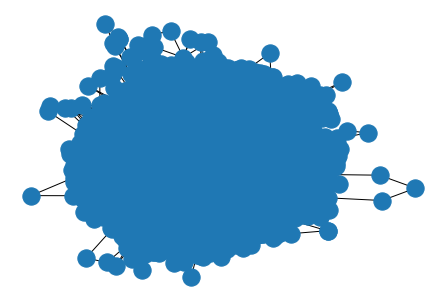

In [41]:
nx.draw(sea)

AttributeError: 'dict' object has no attribute 'edges'

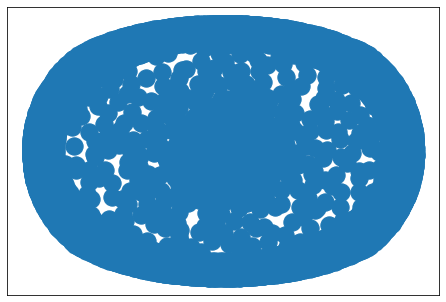

In [15]:
# 3. Visualize networkx graph after Clustering Coefficient
nx.draw(G)